In [249]:
# data processing tools
import pandas as pd
import numpy as np

# NLP tools
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualization tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,8
%matplotlib inline

# NLP tools
import spacy
import re

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('/home/sergei/Desktop/LighthouseLabs/Re_enter_bootcamp/Final_Project/Austin_House_data/austinHousingData.csv')

In [3]:
pd.set_option('display.max_columns', None)

## General observations of the data

In [4]:
raw_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [5]:
raw_df.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [6]:
raw_df.shape

(15171, 47)

In [7]:
raw_df['propertyTaxRate'].unique()

array([1.98, 2.21, 2.01])

In [8]:
raw_df['numOfBathrooms'].unique()

array([ 3.  ,  2.  ,  6.  ,  4.  ,  5.  ,  7.  ,  8.  ,  1.  ,  2.5 ,
       10.  ,  6.5 ,  0.  ,  3.5 ,  4.5 ,  5.5 ,  2.75, 13.  , 27.  ,
        1.5 ,  1.75,  9.  ,  1.7 ])

In [9]:
# 0 bathroom seems strange, as well as 10, 13 and 27 bathrooms - must be a typo

In [10]:
raw_df['zipcode'].unique().size

48

In [11]:
raw_df['city'].unique().size

9

In [12]:
raw_df['homeType'].unique()

array(['Single Family', 'Residential', 'Mobile / Manufactured',
       'Townhouse', 'Condo', 'Vacant Land', 'Multiple Occupancy', 'Other',
       'Apartment', 'MultiFamily'], dtype=object)

In [13]:
raw_df['city'].unique()

array(['pflugerville', 'del valle', 'austin', 'driftwood', 'manor',
       'dripping springs', 'manchaca', 'west lake hills', 'road'],
      dtype=object)

In [14]:
raw_df['yearBuilt'].unique().max()

2020

In [15]:
raw_df['yearBuilt'].unique().min()

1905

In [16]:
raw_df['yearBuilt'].unique().size

115

In [17]:
# Every year from 1905 to 2020 when the house was built is presented

In [18]:
raw_df['latest_saleyear'].unique() # only 4 years of listings in the data

array([2019, 2020, 2018, 2021])

In [19]:
print(raw_df['description'][2])

Under construction - estimated completion in August 2019.  The Pioneer features an expansive open floorplan, 3 spacious bedrooms, 2 bathrooms, and a stunning kitchen. Upon entering the Pioneer, you will pass through the impressive entry way. Keep walking, and you will pass the two private secondary bedrooms which both have large walk-in closets. The entryway leads you into the huge open family room and kitchen area with a huge island with granite counters.  Next to the kitchen is the dining room, conveniently separated from the main living area of the family room.  A large covered patio greets you as you walk out the back door into the backyard.  A private and spacious master suite is the cherry on top of this home and will provide a quiet place for you to relax after a long day.  This home is very close to the fantastic amenity center.  All of this in just 1472 sqft is a deal that you will find very hard to beat!


In [20]:
raw_df.rename(columns={'latestPrice':'price'}, inplace=True)

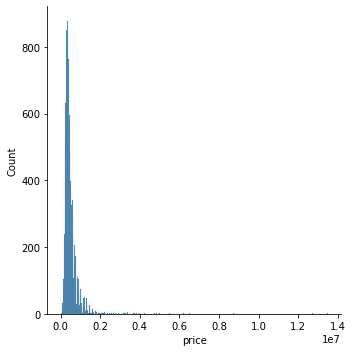

<Figure size 432x288 with 0 Axes>

In [21]:
sns.displot(raw_df['price']);
fig = plt.figure()

# our sales price histogram is positively skewed and has a high peak

In [22]:
#skewness and kurtosis
print("Skewness: %f" % raw_df['price'].skew())
print("Kurtosis: %f" % raw_df['price'].kurt())

Skewness: 8.845543
Kurtosis: 165.318946


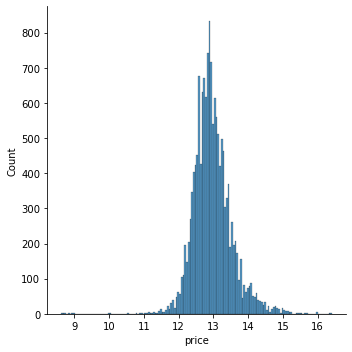

<Figure size 432x288 with 0 Axes>

In [23]:
# log transform our target price to improve normality of distribution - will use it for our future models for more robust results
price_log = np.log(raw_df['price'])

#histogram
sns.displot(price_log);
fig = plt.figure()

### Checking the missing values

In [24]:
raw_df.isna().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
price                         0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [25]:
# No missing values in the whole dataset

### Let's check for duplicate data

In [26]:
raw_df[raw_df.duplicated(subset=['latitude','longitude'], keep=False)].sort_values('latitude')

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage


In [27]:
# no duplicate data

### Let's check the similarity between distributions of price per year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59d570f220>,
      dtype=object)

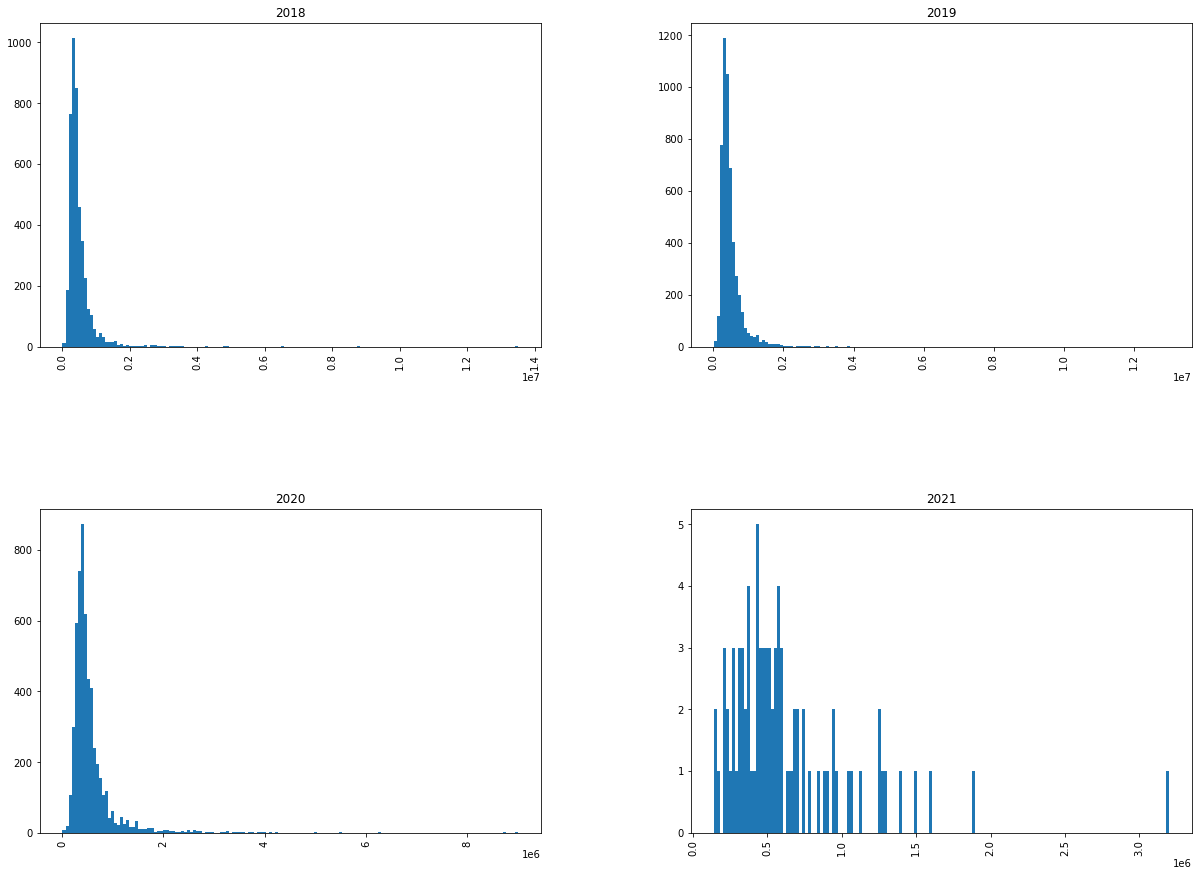

In [28]:
raw_df['price'].hist(by=raw_df['latest_saleyear'], bins=150, figsize=(20,15))

In [29]:
# We can see that 2021 has much fewer samples in the dataset

In [30]:
raw_df.latest_salemonth[raw_df['latest_saleyear'] == 2021].unique() # only January is presented in 2021

array([1])

In [31]:
raw_df['latest_saledate'].min()

'2018-01-22'

In [32]:
raw_df['latest_saledate'].max()

'2021-01-30'

In [33]:
# January 2018 is the earliest month and January 2021 is the latest month

In [34]:
# First try to group by zipcode:
# for i in raw_df['zipcode'].unique():
#     df = raw_df[raw_df['zipcode'] == i]
#     df = df[['zipcode','latitude','longitude']]
#     pd.DataFrame.reset_index(df, drop=True, inplace=True)
#     df.to_csv("zipcode-{}.csv".format(i), index=False)
# - too many groups for mapping on google!!

In [35]:
raw_df['price'].mean()

512767.7437215741

In [36]:
raw_df['price'].median()

405000.0

In [37]:
raw_df['price'].max()

13500000.0

In [38]:
# For mapping on google maps we have to have not more than 2000 items in layer. Also, we can easily drop out the items with prices less than 50000 as an unrealistic price for a lot.
# Also, as discovered recently, not more than 12 layers. It is easier to create separate csv files for each layer. Let's group by price ranges:
df_sub = raw_df[raw_df['price'] <= 50000]
for i in [100000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 600000, 750000, 1000000, 5000000, 15000000]:
    df_limit = raw_df[raw_df['price'] <= i]
    df_res = df_limit[~df_limit.isin(df_sub)].dropna()
    df_sub = df_limit
    df_res = df_res[['price','latitude','longitude']]
    pd.DataFrame.reset_index(df_res, drop=True, inplace=True)
    df_res.to_csv("price_less_than_{}.csv".format(i), index=False)

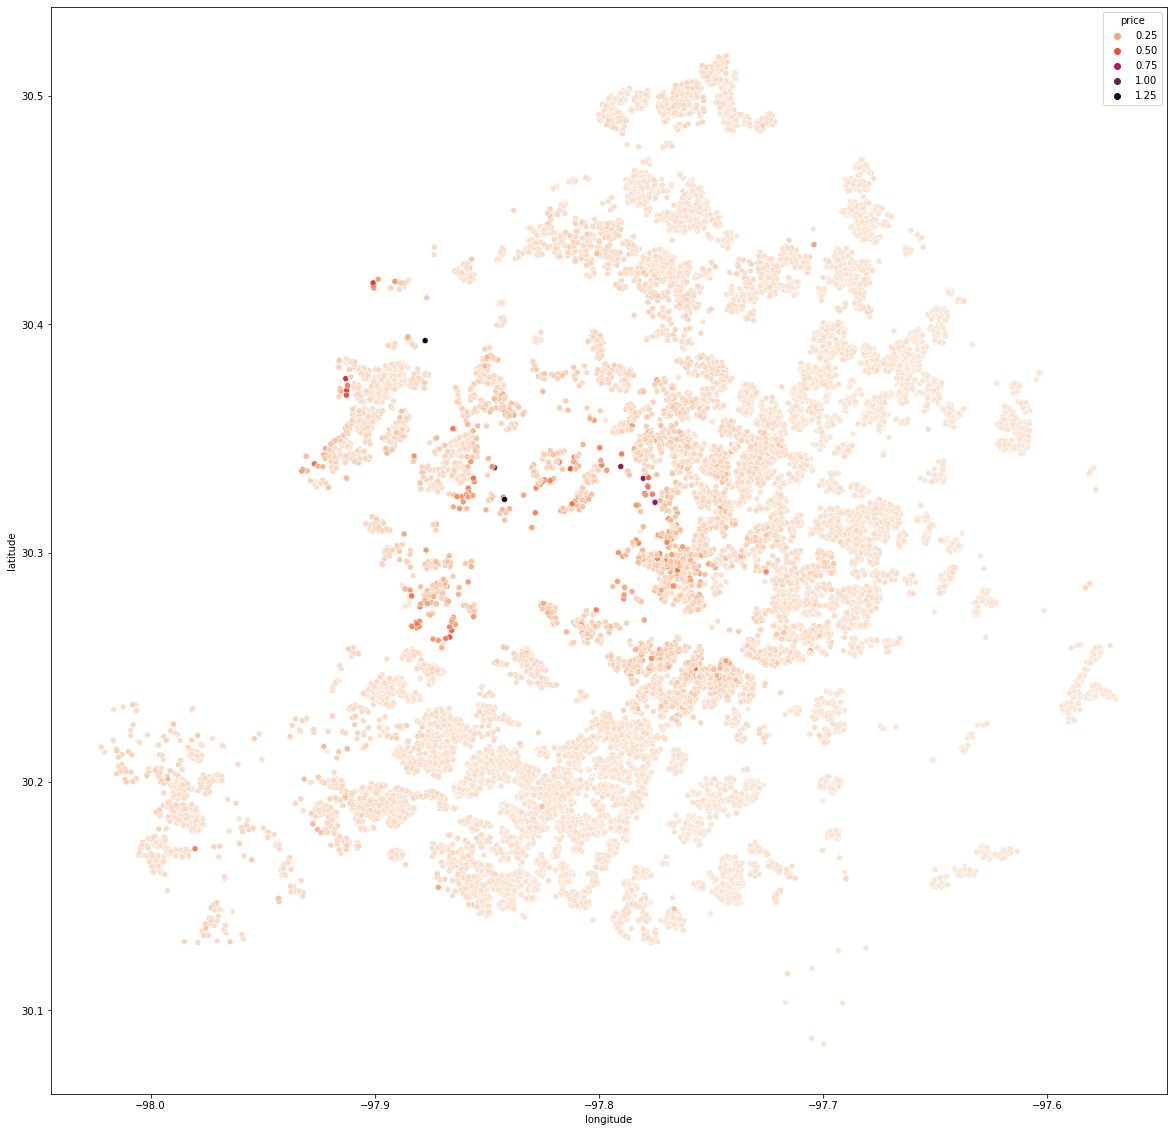

In [39]:
# plotting latitude and longitude as a visual scatter plot to look for location-based outliers

plt.figure(figsize=(20,20))

sns.scatterplot(data=raw_df, x="longitude", y="latitude", hue="price", palette="rocket_r");

### Two-sample Kolmogorov-Smirnov test for similar distributions

In [40]:
from scipy.stats import ks_2samp

In [41]:
prices_2018 = raw_df[(raw_df.latest_saleyear == 2018)].price
prices_2019 = raw_df[(raw_df.latest_saleyear == 2019)].price
prices_2020 = raw_df[(raw_df.latest_saleyear == 2020)].price
prices_2021 = raw_df[(raw_df.latest_saleyear == 2021)].price

In [42]:
ks_2samp(prices_2018, prices_2019)

KstestResult(statistic=0.035186762568710506, pvalue=0.005112451213393654)

In [43]:
# P-value < 0.05 - can reject the 0-hypotheses that 2 distributions are the same - they are different

In [44]:
ks_2samp(prices_2019, prices_2020)

KstestResult(statistic=0.10759163886423315, pvalue=2.1188268336933517e-27)

In [45]:
# P-value is > 0.05 - can reject the 0-hypotheses that 2 distributions are the same - they are different

In [46]:
ks_2samp(prices_2020, prices_2021)

KstestResult(statistic=0.15945836521862933, pvalue=0.027760423962472136)

In [47]:
# P-value < 0.05 - can reject the hypotheses that 2 distributions are the same -  they are different

In [48]:
from scipy.stats import ttest_ind

#perform two sample t-test to check the means
ttest_ind(a=prices_2018, b=prices_2019)

Ttest_indResult(statistic=-1.2330535256682755, pvalue=0.21758576871159419)

In [49]:
ttest_ind(a=prices_2019, b=prices_2020) # we can reject the h0 that means are the same!! - so that they are different instead.

Ttest_indResult(statistic=-5.895582295071585, pvalue=3.846535173618968e-09)

In [50]:
ttest_ind(a=prices_2020, b=prices_2021)

Ttest_indResult(statistic=-1.6270145224044619, pvalue=0.1037913282909304)

In [51]:
# Since we only have prices for January 2021, let's get the average increase in mean price of houses since January 2018 till January 2021 per month
# and adjust our prices accordingly, and see whether that will make the distributions more alike

In [52]:
# The website with changes in mean house prices in Austin per month:
# https://www.zillow.com/austin-tx/home-values/

In [53]:
Jan_2018_mean_house_price = 361000
Jan_2019_mean_house_price = 376000
Jan_2020_mean_house_price = 394000
Jan_2021_mean_house_price = 452000

In [54]:
mean_price_increase_2018_2019 = (Jan_2019_mean_house_price - Jan_2018_mean_house_price) / Jan_2018_mean_house_price
mean_price_increase_2019_2020 = (Jan_2020_mean_house_price - Jan_2019_mean_house_price) / Jan_2019_mean_house_price
mean_price_increase_2020_2021 = (Jan_2021_mean_house_price - Jan_2020_mean_house_price) / Jan_2020_mean_house_price

In [55]:
print(round(mean_price_increase_2018_2019, 4),
      round(mean_price_increase_2019_2020, 4),
      round(mean_price_increase_2020_2021, 4)
     )

0.0416 0.0479 0.1472


### Let's adjust prices on average according month to the month increase so that to put them into the same distribution

In [56]:
jan2018_to_2019 = mean_price_increase_2018_2019/12
jan2019_to_2020 = mean_price_increase_2019_2020/12
jan2020_to_2021 = mean_price_increase_2020_2021/12

# create reverse month order for price adjustment
for i in range(1,13):
    raw_df['reverse_order'] = raw_df['latest_salemonth'].apply(lambda x: abs(x-13))

# adjust 2018 to 2019
raw_df.loc[raw_df['latest_saleyear']==2018, 'adj_price'] = raw_df.loc[raw_df['latest_saleyear']==2018].apply(lambda x: int( (x['price'])*(1+(jan2018_to_2019*x['reverse_order']))*(1+(jan2019_to_2020*x['reverse_order']))*(1+(jan2020_to_2021*x['reverse_order'])) ) , axis=1 )

# adjust 2019 to 2020                                                            
raw_df.loc[raw_df['latest_saleyear']==2019, 'adj_price'] = raw_df.loc[raw_df['latest_saleyear']==2019].apply(lambda x: int( (x['price'])*(1+(jan2019_to_2020*x['reverse_order']))*(1+(jan2020_to_2021*x['reverse_order'])) ) , axis=1)
                                                                                  
# adjust 2020 to 2021
raw_df.loc[raw_df['latest_saleyear']==2020, 'adj_price'] = raw_df.loc[raw_df['latest_saleyear']==2020].apply(lambda x: int( (x['price'])*(1+(jan2020_to_2021*x['reverse_order'])) ), axis=1)

#copy 2021 to self
raw_df.loc[raw_df['latest_saleyear']==2021, 'adj_price'] = raw_df.loc[raw_df['latest_saleyear']==2021].apply(lambda x: int(x['price']), axis=1)

# rename original price column and make adj_price our price column
raw_df.rename(columns={'price' : 'orig_price', 'adj_price' : 'new_price'}, inplace=True)

# put price at the front of the data frame
raw_df.set_index('new_price', inplace=True)
raw_df.reset_index(inplace=True)

### Check distributions after adjustment

In [57]:
new_prices_2018 = raw_df[(raw_df.latest_saleyear == 2018)].new_price
new_prices_2019 = raw_df[(raw_df.latest_saleyear == 2019)].new_price
new_prices_2020 = raw_df[(raw_df.latest_saleyear == 2020)].new_price
new_prices_2021 = raw_df[(raw_df.latest_saleyear == 2021)].new_price

In [58]:
ks_2samp(new_prices_2018, new_prices_2019)

KstestResult(statistic=0.02200081362807625, pvalue=0.1923650910598681)

In [59]:
ks_2samp(new_prices_2019, new_prices_2020) # P value is still very low - have to reject the h0 that distributions are the same

KstestResult(statistic=0.08143243903688395, pvalue=7.242886500169399e-16)

In [60]:
ks_2samp(new_prices_2020, new_prices_2021)

KstestResult(statistic=0.10443620864551263, pvalue=0.31228075065690486)

In [61]:
ttest_ind(a=new_prices_2018, b=new_prices_2019)

Ttest_indResult(statistic=-0.11353825289382738, pvalue=0.9096061946824756)

In [62]:
ttest_ind(a=new_prices_2019, b=new_prices_2020) # still we reject the h0 and means are different (maybe we should look for outliers here!!)

Ttest_indResult(statistic=-4.039150999799456, pvalue=5.401995265712246e-05)

In [63]:
ttest_ind(a=new_prices_2020, b=new_prices_2021)

Ttest_indResult(statistic=-0.7857027295419698, pvalue=0.4320755281462759)

### Working with outliers and low number of samples within groups. Dropping data.

In [64]:
raw_df.groupby('zipcode')['latitude'].count()

zipcode
78617      86
78619      12
78652       4
78653       4
78660      36
78701       8
78702     397
78703     302
78704     706
78705      68
78717     516
78719       5
78721     255
78722     100
78723     558
78724     223
78725     162
78726     178
78727     417
78728     225
78729     318
78730     244
78731     495
78732     597
78733     214
78734       9
78735     311
78736     163
78737     617
78738       1
78739     605
78741     224
78742       4
78744     472
78745    1039
78746     195
78747     381
78748    1144
78749     774
78750     321
78751     174
78752     153
78753     442
78754     393
78756     140
78757     523
78758     395
78759     561
Name: latitude, dtype: int64

In [65]:
# We're going to drop our few zip codes where we have less than 10 data points
df_drop1 = raw_df.drop(raw_df.loc[(raw_df['zipcode']==78652) | 
                                  (raw_df['zipcode']==78653) | 
                                  (raw_df['zipcode']==78701) | 
                                  (raw_df['zipcode']==78719) | 
                                  (raw_df['zipcode']==78734) | 
                                  (raw_df['zipcode']==78738) | 
                                  (raw_df['zipcode']==78742)].index, axis=0)

In [66]:
df_drop1['homeType'].value_counts(normalize=True)

Single Family            0.939152
Condo                    0.030655
Townhouse                0.011496
Multiple Occupancy       0.006342
Vacant Land              0.005418
Apartment                0.002445
Residential              0.002312
Mobile / Manufactured    0.001123
MultiFamily              0.000661
Other                    0.000396
Name: homeType, dtype: float64

In [67]:
# since the first 3 types make more than 97% in total, we can easily drop the others

In [68]:
df_drop2 = df_drop1.loc[((df_drop1['homeType'] == 'Single Family') | (df_drop1['homeType'] == 'Condo')) | (df_drop1['homeType'] == 'Townhouse')]

In [69]:
# Let's look for the outliers
df_drop2.describe()

,new_price,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,orig_price,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,reverse_order
count,1.485300e+04,1.485300e+04,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,1.485300e+04,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,1.485300e+04,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000,14853.000000
mean,5.616887e+05,1.039807e+08,78736.064027,30.291906,-97.778843,1.994217,1.227429,1.226823,1988.713863,5.112594e+05,3.031509,6.722548,2019.077089,30.819296,0.013061,3.490406,1.710092,0.667811,0.472968,0.002424,0.211068,0.011580,1.210177e+05,2205.542113,0.940955,0.048879,1.035010,0.977446,1.837865,5.792671,1239.885006,14.869117,2.696556,3.441998,1.469467,6.277452
std,4.841355e+05,3.161462e+08,18.791681,0.097301,0.084846,0.053335,1.340791,1.340919,21.492512,4.400991e+05,2.479993,3.137907,0.813167,21.166842,0.179675,1.867729,0.778951,0.983262,0.828736,0.056798,0.491052,0.113108,1.238317e+07,1368.557331,0.236003,0.234471,0.260492,0.292358,1.065578,1.860480,325.694349,1.742545,1.025664,0.811117,0.523833,3.137907
min,6.056000e+03,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.130000e+02,306.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000,1.000000
25%,3.385660e+05,2.941137e+07,78727.000000,30.202938,-97.838654,1.980000,0.000000,0.000000,1975.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1485.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,983.000000,14.000000,2.000000,3.000000,1.000000,4.000000
50%,4.461580e+05,2.949521e+07,78739.000000,30.285250,-97.769821,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.232000e+03,1976.000000,1.000000,0.000000,1.000000,1.000000,1.566667,6.000000,1298.000000,15.000000,3.000000,3.000000,1.000000,6.000000
75%,6.268920e+05,7.033870e+07,78749.000000,30.367321,-97.718269,1.980000,2.000000,2.000000,2006.000000,5.749990e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000,9.000000
max,1.517699e+07,2.146313e+09,78759.000000,30.517174,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,10.000000,6.000000,8.000000,6.000000,2.000000,4.000000,3.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000,12.000000


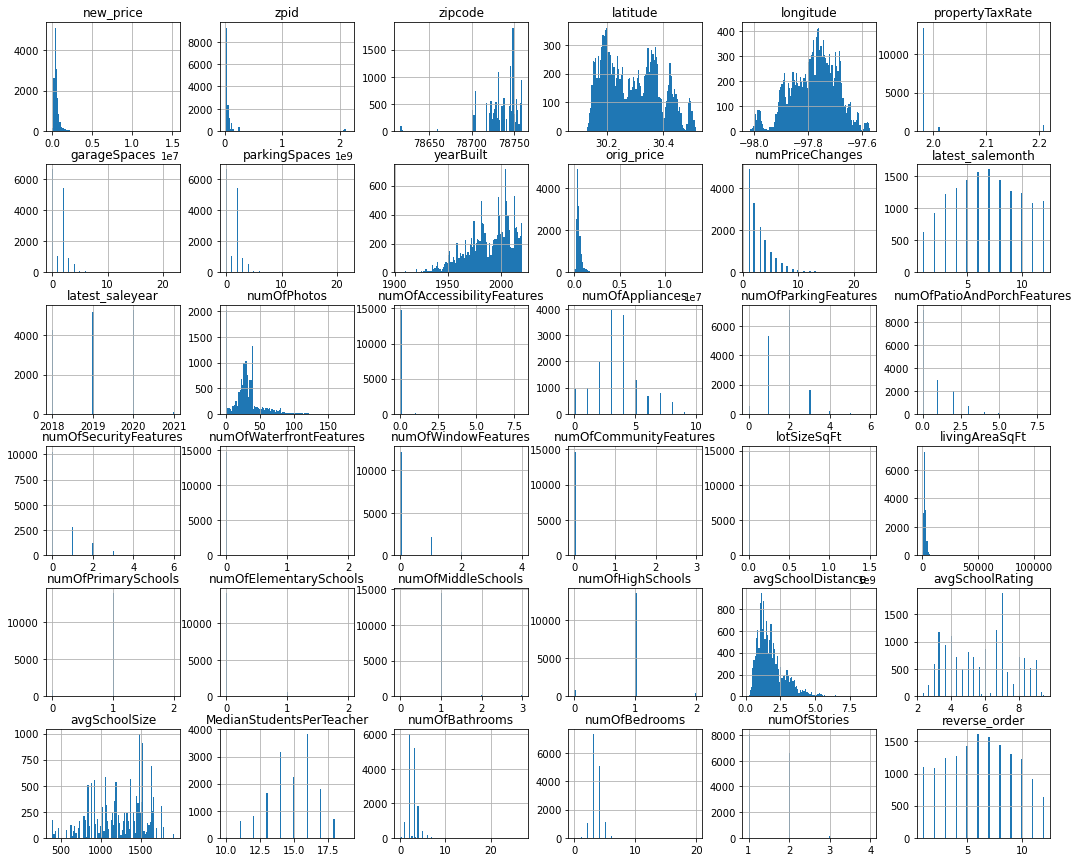

In [70]:
# check how our histograms are looking
df_drop2.hist(figsize=(18,15), bins=100);

In [71]:
# We can observe outliers in new_price and orig_, lotSizeSqFt, livingAreaSqFt, and numOfBathrooms, numOfBedrooms, garageSpaces, parkingSpaces by looking at 'max' row as well as histogramms.

In [72]:
# pd.set_option('display.max_colwidth', None)

### Working with lotSizeSqFt

In [73]:
#check what is going on with the lotSizeSqFt outliers by sorting descending
pd.set_option('display.max_colwidth', None)
df_drop2[['orig_price','description','lotSizeSqFt','livingAreaSqFt']].sort_values('lotSizeSqFt', ascending=False).head(20)

,orig_price,description,lotSizeSqFt,livingAreaSqFt
14654,1650000.0,"Fabulous 4 Bed 4 Bath house on one of the largest lots in 78703, situated on .795 Acres with a seasonal wet water creek and towering trees. Beautiful renovation in 2019 including a gorgeous kitchen, master bedroom and ensuite bath. Peaceful views of the creek. Excellent central location close to Downtown, Domain and SoCo. Large upstairs area can be a game room or living area. Walking distance to Lake Austin, Casis Elementary, Casis Village, Westwood CC, Mt. Bonnell, Laguna Gloria, Mayfield Park and more. Side lot extends to Balcones, build a privacy wall for your own estate!",1.508483e+09,3328.0
9244,179900.0,"Leased for $1695 though 7/31/2020 - Unique gated community, quiet, and one of the most sought after locations in West Campus, 2 (TWO) parking spaces, High ceilings, split level 2 bedroom (one is a loft), one bath with marble & custom laminate floors which were recently replaced. Private deck-close to UT & downtown- Leased for $1695 though 7/31/2020",3.415452e+07,728.0
11116,187471.0,"**Subject to City of Austin SMART Housing and Mueller Foundation Affordable Home Program requirements. (80% MFI). BUYER MUST HAVE PRE-QUALIFICATION** See Process/COVID docs for application process. Walk to Thinkery, Drafthouse, HEB, hike & bike trails, playgrounds/community pools. Great Community to Live, Work, and Play! This isa resale-restricted home and must be sold to an income-qualified buyers. See Docs/Agent for details.**",2.617956e+07,815.0
2340,569000.0,"4304 Front Range Ln, Austin, TX 78732 is a single family home that contains 3,183 sq ft and was built in 2014. It contains 4 bedrooms and 3 bathrooms. \r\n \r\nThe Zestimate for this house is $663,100. The Rent Zestimate for this home is $3,150/mo.",8.712000e+06,3183.0
4635,999500.0,"201 Charismatic Pl, Austin, TX 78737 is a single family home that contains 4,459 sq ft and was built in 2015. It contains 5 bedrooms and 6 bathrooms. \r\n \r\nThe Zestimate for this house is $1,044,460. The Rent Zestimate for this home is $2,950/mo.",8.581320e+06,4459.0
8071,225000.0,"Newly remodeled 3-2 conveniently located in Brushy Creek. This is an open floor plan that feels much larger than the stated size. New features include fresh paint, tile, carpet, fixtures, new furnace, new exterior doors, blinds, etc. New 30 year roof installed this year. One car garage with opener. Has two large master bedrooms and one smaller. Ceiling fans throughout. Gas heat and cooking. Large back yard. Planter beds in the front are ready for your personal touch.This is a MUST SEE nice home with great neighbors. Ready to move in and enjoy!\r\n\r\nNeighborhood Description\r\n\r\nGreat family oriented neighborhood in walking distance of exemplary Brushy Creek Elementary school. Walk to parks and trails. Convenient central location. Must see this one!",5.967720e+06,1217.0
3549,435000.0,"Don't miss out on this central Austin gem. Rare opportunity in fabulous, high demand Crestview neighborhood. Huge, extensively xeriscaped yard, solar panels, well cared for, charming property. Ready for remodeling or reconstruction, make it ""your own"".",5.902380e+06,1166.0
869,599900.0,"Rare 2 story home with 5 bed, 4.5 bath, dedicated office, game room AND theater room. One of the most desired features of this home is the 2 spacious master suites downstairs with 2 full + 1/2 bathrooms. This home shows like a model home with features ranging from stunning hardwoods, high-end finishes, tankless water heater, vaulted ceilings, recessed lighting, built-in speakers, stunning cast stone gas fireplace, granite countertops throughout the home to an outdoor living area with a built-in kitchen and BBQ grill. Luxury master suite has an oversized frameless shower enclosure and drop-in garden tub. The game room offers an additional living space. The theater room provides the key to a relaxing night in. Excellent Round Rock ISD schools and neighborhood amenities.\r\n\r\nThis home is 

In [74]:
# lot size for the second lot is 0.795 acre according to description = 34630.2 sqrft = 3.46302e+04 - definitely less than posted.
df_drop2.loc[df_drop2.index==14654, 'lotSizeSqFt'] = 34630.2
# lot size for othersecond, third and sixth and eleventh ads are inadequate according to description and price.
# Seems like common area of the building and nearby common amenities and trails are included in lot size. 
# We will fix that a bit later.

In [75]:
# check what is going on with the lotSizeSqFt outliers by sorting ascending
df_drop2[['orig_price','description','lotSizeSqFt','livingAreaSqFt']].sort_values('lotSizeSqFt', ascending=True).head(10)

,orig_price,description,lotSizeSqFt,livingAreaSqFt
11989,305000.0,"nice cozy home in a nice quiet area, close to schools and stores , yet nestle away from the noise. owner is willing to pay 5000.00 for buyers closing cost .Seller would like an hour before showing please make arrangements.Please make the time to show this well kept home to your homebuyers.",113.0,1245.0
10475,457000.0,"Charming, immaculate, updated w/ bright sunny kitchen, quartz counter tops, Stainless Steel appliances, new cabinets, NEW ROOF, game room. Great for entertaining in the warm spacious living room to the private backyard patio to enjoy. Hardwood floors throughout, fireplace, updated bathrooms, freshly painted, move in ready. Located minutes from downtown Austin, Garrison & Dittmar Park. Mature trees, separate out building, plenty of parking & storage. No HOA & no carpet. See virtual tour.Guest Accommodations: Yes Restrictions: Yes",117.0,2172.0
8959,271860.0,"MLS# 5693041 - Built by Village Builders - June completion! ~ This lovely 3 beds, 2 bath single story home with open concept, separate dining area, master bedroom has large walk in shower and is located at back of home as the other 2 beds are in the front part of the home.",392.0,1474.0
3628,212900.0,"Great Starter Home in fantastic location for you! 3 bed, 1 3/4 bath condo, over 1,400SF, with the private (HOA) pool directly across the street! Nest Thermostat, Stainless steel range and dishwasher, motion-activated kitchen faucet. HOA dues pay for water bill.",392.0,1415.0
3666,205000.0,"8900 Trone Cir APT A, Austin, TX 78758 is a condo home that contains 1,080 sq ft and was built in 1972. It contains 2 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $204,554. The Rent Zestimate for this home is $1,500/mo.",392.0,1080.0
3656,189900.0,"Rare unit in the Orange Grove! Condo with a private yard and large two car garage! Recent updates include high efficiency a/c system (2017), water heater (2017), interior paint, and ""wood"" vinyl floors installed upstairs. Unit has no carpet! Backyard has been xeriscaped for low maintenance. Back yard shed has power run to it, great for a work area or storage. New privacy fence is coming. Great location, easy access to shopping and highway.",396.0,1080.0
3647,157500.0,"Under market pricing!!! Owner wants to move it quickly! He is willing to go well under market value for December contract! This 3 bedroom condo is located right off Payton Gin Rd about 1/2 mile from 183. It's part of the well sought after Orange Grove Condominium community. It is close to MoPac/I 35 and the Domain Shopping area. Recently upgraded with newer paint, laminate and vinyl flooring. Recent carpet replaced in the Master Bedroom and the hall/stairs as well.",400.0,1355.0
9206,205000.0,"Huge 1/1 right off the drag. Giant living room with a fireplace and a washer/dryer in the unit. Ground floor unit with a patio area adjacent. All kitchen appliances included, parking in included and much more. Walk to UT, walk to the Drag; shopping.dining right out your front door.",435.0,567.0
10598,500000.0,"407 Post Road Dr, Austin, TX 78704 is a single family home that contains 1,104 sq ft and was built in 2018. It contains 3 bedrooms and 3 bathrooms. \r\n \r\n",435.0,1104.0
977,342000.0,"Best price around and excellent opportunity for home seekers in the area! Gorgeous and very meticulously maintained 1 story Buffington home. Greenbelt corner lot! A home will never be built behind you. A comfortable backyard for evening enjoyment and covered patio with built in speakers and gas for BBQ. Open kitchen w/large bar and granite counters, high ceilings, hard tile floors in family. Additional energy efficiency features-great garage storage. This is a beautiful home; come see for yourself!",435.0,1753.0


In [76]:
# We can see that lotSiseSqFt is less than livingAreaSqFt, which is wrong.

In [77]:
# Let's calculate how many lotSizes are actually smaller than livingArea
df_drop2[['orig_price','description','lotSizeSqFt','livingAreaSqFt']].loc[df_drop2['lotSizeSqFt'] < df_drop2['livingAreaSqFt']]

,orig_price,description,lotSizeSqFt,livingAreaSqFt
977,342000.0,"Best price around and excellent opportunity for home seekers in the area! Gorgeous and very meticulously maintained 1 story Buffington home. Greenbelt corner lot! A home will never be built behind you. A comfortable backyard for evening enjoyment and covered patio with built in speakers and gas for BBQ. Open kitchen w/large bar and granite counters, high ceilings, hard tile floors in family. Additional energy efficiency features-great garage storage. This is a beautiful home; come see for yourself!",435.0,1753.0
2134,174900.0,Charming TOWNHOME in HOT South Austin! 2 story floorplan with SPACIOUS bedroom sizes. SLEEK kitchen with granite countertops and stainless steel apartments. Half bath on the main floor. Upgraded flooring with stone fireplace. Spacious fenced in back yard for extra outdoor living space. Master bedroom has ample storage space with attached full bathroom. W/D on main floor with barn door separating it from the kitchen. Easy access to I-35! AMAZING opportunity! Make your appointment today!,609.0,1226.0
2157,169000.0,"Really cute, two-story town home with lots of character! 2/1.5, loft style, fireplace, nice natural light, low utilities, covered parking, private patio/small yard, backs up to onion creek. Nice, quiet community with a lot of long time residents. Very friendly. NOT your same old, same old, they-all-look-the-same, apartment complex. Call to set up a visit.",605.0,1198.0
2168,156000.0,"6907 Old Post Loop, Austin, TX 78744 is a townhome home that contains 1,200 sq ft and was built in 1979. It contains 2 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $188,122. The Rent Zestimate for this home is $1,600/mo.",609.0,1200.0
3228,265000.0,"GREAT investor potential in the Windsor Hills neighborhood of Austin, TX. Excellent brick home on a corner lot with great fixer-upper potential or investor rental/flip. Home sits on a beautiful large corner lot with two storage/workshop buildings in the backyard. Excellent location and close to Dell corporate in Austin. Home being sold AS-IS.",1711.0,1713.0
3628,212900.0,"Great Starter Home in fantastic location for you! 3 bed, 1 3/4 bath condo, over 1,400SF, with the private (HOA) pool directly across the street! Nest Thermostat, Stainless steel range and dishwasher, motion-activated kitchen faucet. HOA dues pay for water bill.",392.0,1415.0
3647,157500.0,"Under market pricing!!! Owner wants to move it quickly! He is willing to go well under market value for December contract! This 3 bedroom condo is located right off Payton Gin Rd about 1/2 mile from 183. It's part of the well sought after Orange Grove Condominium community. It is close to MoPac/I 35 and the Domain Shopping area. Recently upgraded with newer paint, laminate and vinyl flooring. Recent carpet replaced in the Master Bedroom and the hall/stairs as well.",400.0,1355.0
3656,189900.0,"Rare unit in the Orange Grove! Condo with a private yard and large two car garage! Recent updates include high efficiency a/c system (2017), water heater (2017), interior paint, and ""wood"" vinyl floors installed upstairs. Unit has no carpet! Backyard has been xeriscaped for low maintenance. Back yard shed has power run to it, great for a work area or storage. New privacy fence is coming. Great location, easy access to shopping and highway.",396.0,1080.0
3666,205000.0,"8900 Trone Cir APT A, Austin, TX 78758 is a condo home that contains 1,080 sq ft and was built in 1972. It contains 2 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $204,554. The Rent Zestimate for this home is $1,500/mo.",392.0,1080.0
4372,425000.0,"200 Galloway Ln, Austin, TX 78737 is a single family home that contains 3,000 sq ft and was built in 2010. It contains 3 bedrooms and 3 bathrooms. \r\n \r\nThe Zestimate for this house is $449,235. The Rent Zestimate for this home is $2,950/mo.",2500.0,3000.0


In [78]:
# As we can see, there is no information about the lot size attached to the house/apartment in all of this ads. 
# But the square footage of the living area is shown correctly in most of them. So let's just make these numbers equal to the square footage of the living area in these cases:
df_drop2.loc[df_drop2['lotSizeSqFt'] < df_drop2['livingAreaSqFt'], 'lotSizeSqFt'] = df_drop2['livingAreaSqFt']

### Check LivingAreaSqFt

In [79]:
#check what is going on with the livingAreaSqFt outliers by sorting ascending
df_drop2[['orig_price','description','lotSizeSqFt','livingAreaSqFt']].sort_values('livingAreaSqFt', ascending=True).head(20)

,orig_price,description,lotSizeSqFt,livingAreaSqFt
3518,139000.0,"404 Primrose St, Austin, TX 78753 is a single family home that contains 306 sq ft and was built in 1945. It contains 1 bedroom and 1 bathroom. \r\n \r\nThe Zestimate for this house is $161,579. The Rent Zestimate for this home is $1,275/mo.",11761.2,306.0
13314,175000.0,"Old West Austin Efficiency. Close to metro/UT lines, downtown, Pease Park.. as well as a number of hip & trendy areas off West Lynn & Enfield. Appliances included. HOA replaced siding a few years ago. HVAC replaced in 2017 and recently serviced. Service warranty is transferable to new owner (see Seller's Disclosure). Spectrum internet/cable wired. ECAD, As-is, seller's & other disclosures available upon request.",657.0,378.0
9213,151500.0,"Very desirable location for UT students only 5 minutes from campus. Small, quiet condominium community with only 8 units. 1 parking spot included. Sewer, Trash, common insurance paid by HOA. W/D combo in unit.",815.0,450.0
10118,499000.0,"Great opportunity to build on your lot in highly sought after East Austin. Total buildable SQFT for lot approx. 2329.74. See attached plans which include 3-story, 2068 SQFT home w/3 beds/3 baths, attached carport & multiple decks. No heritage Trees. Majority of demo already completed. Detached garage w/newly constructed 450 SQFT garage apartment offering private ally access (MLS #4644317) Live in garage apt while building dream home. Future income potential. Buyer & buyers builder to do own due diligence.",5837.0,450.0
10698,224900.0,"Fab SoCo studio condo, just a few yrs old, turn key and move in ready. Clean, modern style, great light and with everything great about Austin right outside. Complete with all appliances, including full size washer & dryer. Hardwood floors and designer tile. Lives a lot bigger than the sqft indicates. Romeo & Juliet balcony opens up the living space to the outdoors, with great view and sunlight, looking towards downtown. Quiet building, energy efficient, elevator access. Great unit, condition and location",583.0,466.0
10230,169900.0,"Boho-modern tiny house in fantastic location! So many upgrades from cosmetic to major systems (siding, roof, electrical, plumbing, insulation). Updated kitchen and bathrooms, vintage clawfoot tub, Carrara tile, custom wood flooring, recessed LED lighting, and more. Great home for someone who loves good design, the outdoors in an urban location.",1481.0,466.0
9482,319900.0,Excellent build/remodel opportunity in Holly District. Close proximity to dining and several new East Austin attractions. Current tenant is month to month.,2744.0,468.0
9338,395000.0,"Property is currently occupied by tenant who is on a month-to-month lease at $1,600/month. Owner does not want tenant to be disturbed.",8232.0,480.0
13868,200000.0,"Minimalist condo with clever upgrades throughout! This is a corner unit in a low maintenance, friendly, quaint complex. Features include a huge walk-in closet, upgraded windows, Nest thermostat, August smart locks, Quartz countertops, Edison bulb fixtures, gas cook top, built in fridge, freezer and soft close drawers. HOA includes: gas, water and trash. A must see!",1045.0,483.0
9892,125000.0,"Investors and Buyers looking for prime location on a half an acre in the growing East Austin, minutes away from Downtown,Airport,Mueller and UT,well bring your offer.Price only reflects land.",21344.4,488.0


In [80]:
# the smallest square footage is confirmed, although the land lot square footage is smaller plus it is for demolishing. The fourth, tenth and eighteenth sq footage are land plots for building, so we drop them all.
df_drop3 = df_drop2.drop(index=[3518, 10118, 9892, 9921])

In [81]:
#check what is going on with the livingAreaSqFt outliers by sorting descending
df_drop3[['orig_price','description','streetAddress','lotSizeSqFt','livingAreaSqFt']].sort_values('livingAreaSqFt', ascending=False).head(10)

,orig_price,description,streetAddress,lotSizeSqFt,livingAreaSqFt
705,385000.0,"Level building site with great canyon views and cul-de-sac location. Sevenoaks ACC approved Cornerstone plans, including engineered foundation plans, available for purchase for 5300 sq ft home. Traffic Light being installed at entrance to Sevenoaks and Bee Caves Rd (per HOA).",201 Marly Way,109335.6,109292.0
2557,829000.0,"New Construction, EANES Schools, 4bed 3 bath, close to Lake Austin. Spray foam insulation, Propane Cooktop. Open living/dining/kitchen. Master downstairs.",9704 Saugus Ln,103237.2,29440.0
2316,13500000.0,"12400 Cedar Street - Villa Del Lago is a uniquely magnificent estate situated on 16+ hillside acres of prime south shore lake front property, boasting unobstructed and panoramic elevated views of Lake Travis. Close to the main house a dramatic pavilion with fireplace, two bars and two baths, sits exclusively on a hillside hollow with captivating, breath-taking views of the lake and big Texas sunsets - a perfect venue for special events. Meticulously designed and professionally landscaped lawns and gardens feature native plants, trees, shrubs, in addition to extensive seasonal plantings, all accented with comprehensive landscaping lighting. Elegant and striking grotto with multiple dramatic cascading waterfalls is carved into the canyon hillside, along with stone carved staircases, bridge, and fish pond, all naturally blended into the hillside between main house and pavilion.\r\n \r\n With lake views from nearly every room, the main house of nearly 15,400 square feet, features 6 bedrooms, 13 baths, 5 fireplaces, media room, home theater, library, hearth/formal living room, formal dining, wine cellar, and massage room. Gourmet chef's kitchen features Viking appliances, triple ovens, built-in fridge, and coffee machine, large center island with breakfast bar seating, separate bar island, and high grade granite and marble counters. Extensive entertainment bar, game room, sitting and piano area. A large private master suite features steam showers, his & her closets and bathrooms, garden Jacuzzi tub, and walk-out bedroom balcony. Home includes 4 laundry areas, mudroom, 5-car garage, extensive balconies and porches, double staircase in rotunda foyer, wood shutters, marble and antique wood fireplaces, herring-bone wood and marble floors throughout. The décor of the home was professionally selected with quality and comfort in mind; some furniture conveys. In addition, the home has an elevator, guest quarters, private office, half basketball court, home fitness gym, Homeworks smart estate automation system and video surveillance.\r\n \r\n A negative edge pool comes complete with outdoor bath, slide, hot tub, fire pit, built-in grill, smoker, and mini-fridges. The estate also includes a private custom boat house with bathroom and deck, slips for two boats and jet skis. The property includes fenced pastures for exotics and several dog pens. Four wrought-iron gates, one service gate, additional outdoor storage house. Small road, cart paths, and additional guest parking are available throughout the estate on Cedar St., located just off RR620, with easy access to/from Lakeway or Downtown Austin. Perimeter security fencing, rain water collection, generator, and underground law and garden irrigation system with a private well.\r\n \r\n The main house is constructed on graded concrete slab, supported by a commercial building red iron super structure, concrete subfloors, and incorporates a lightning protection rod at nine points on the roof. The roof is topped with clay tiles, Italian-themed copper domes and skylight features. Inside the house a secret stairwell leads to a safe room enclosed with four concrete walls, solid metal door, and a hidden dedicated wiring and ventilation system.",12400 Cedar St,710899.2,15394.0
5328,2700000.0,"*$6,762,377 is Tax Value - Set in exclusive Barton Creek area with estate size grounds and lavish appointments, th

In [82]:
# First two are construction projects with inadequate living area. I will just drop them.

In [83]:
df_drop4 = df_drop3.drop(index=[705, 2557])

### Let's look closer at the distribution of the LivingArea and LotSize and figure out how to delete outliers

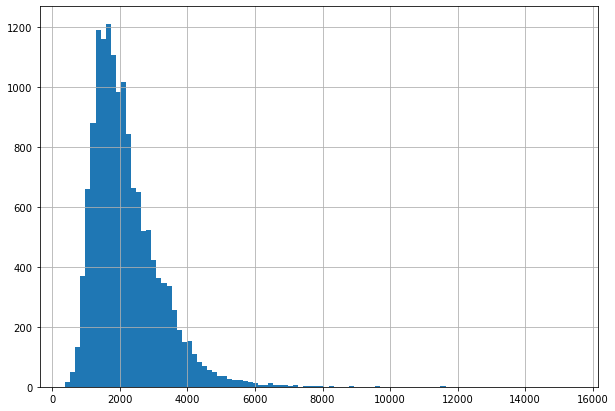

In [84]:
df_drop4.livingAreaSqFt.hist(figsize=(10,7), bins=100)

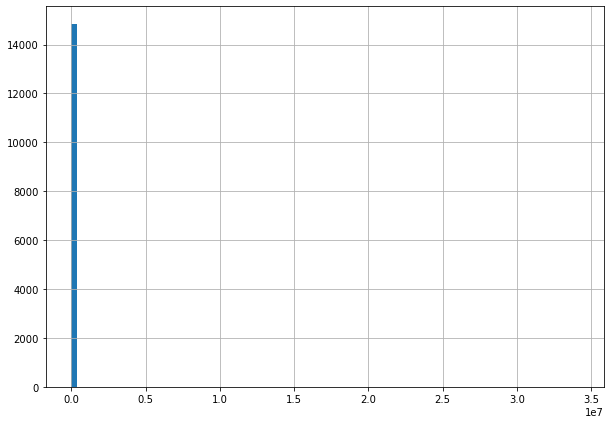

In [85]:
df_drop4.lotSizeSqFt.hist(figsize=(10,7), bins=100)

In [86]:
# We can observe very long flat tails which give us a signal about outliers.
# Since both of the distributions are positively skewed, we can not use standart deviation to exclude outliers. Let's use IQR instead. 
# We know that standart practice to consider a datapoint an outlier if it is out of the +- 1.5*IQR from the median. But as we don't have too much data, so let's use even stricter condition as 1.75*IQR

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.6"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.75 * iqr)
    upper_range = Q3 + (1.75 * iqr)
    return lower_range,upper_range 

In [87]:
# determing our IQR for LivingArea and Lotsize
lotSizeLower,lotSizeUpper = iqr_outliers(df_drop4.lotSizeSqFt)
livAreaLower, livAreaUpper = iqr_outliers(df_drop4.livingAreaSqFt)

# dropping the things outside of our lower and upper range
df_drop4.drop(df_drop4[ (df_drop4.lotSizeSqFt > lotSizeUpper) | (df_drop4.lotSizeSqFt < lotSizeLower) ].index , inplace=True)
df_drop4.drop(df_drop4[ (df_drop4.livingAreaSqFt > livAreaUpper) | (df_drop4.livingAreaSqFt < livAreaLower) ].index , inplace=True)

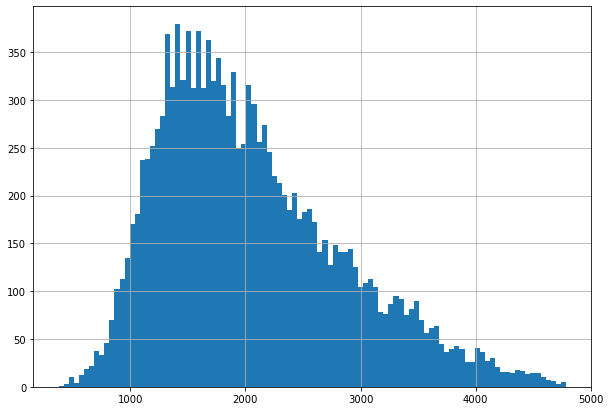

In [88]:
# let's check the hists again
df_drop4.livingAreaSqFt.hist(figsize=(10,7), bins=100)

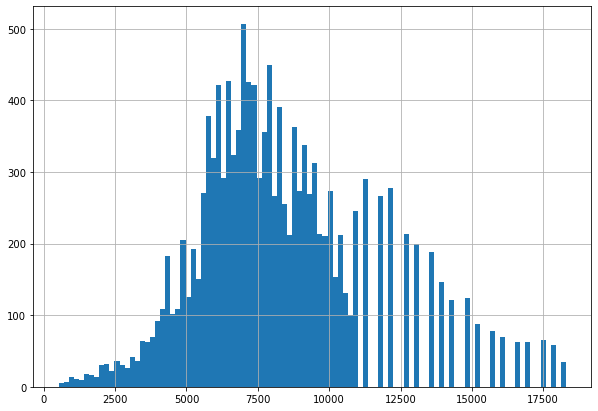

In [89]:
df_drop4.lotSizeSqFt.hist(figsize=(10,7), bins=100)

In [90]:
# Much better now

### Check numOfBathrooms

In [91]:
# Let's check what is going on with the numOfBathrooms outliers by sorting descending
df_drop4[['orig_price','description','numOfBathrooms','numOfBedrooms','livingAreaSqFt']].sort_values('numOfBathrooms', ascending=False).head(10)

,orig_price,description,numOfBathrooms,numOfBedrooms,livingAreaSqFt
2838,745000.0,"Well-maintained home in highly desirable Northwest Hills, walking/biking distance to new state-of-the-art elementary school. This gem, on the quiet end of Far West, has vaulted ceilings in the living room and master and fresh interior paint 8/2020. This house is move-in ready or it could be updated to the buyers' dream home. No carpet, bamboo floors throughout with tile in the wet areas. Separate utility room/pantry and half bath off the kitchen. Large back yard with organic garden and more. Sprinkler Sys:Yes",27.0,4,2137.0
13914,2595000.0,"805 W Annie St, Austin, TX 78704 is a single family home that contains 4,033 sq ft and was built in 2019. It contains 6 bedrooms and 7 bathrooms. \r\n \r\nThe Zestimate for this house is $2,662,170. The Rent Zestimate for this home is $11,236/mo.",7.0,6,4033.0
13789,1425000.0,"October 31 completion! Brand new 3-story modern farmhouse with back unit located in hot 78704. Front features 3 beds, 3.5 bath with 3rd story loft with full bath. Open floor plan, loaded with windows for abundant light & designer finishes throughout incl. hardwoods, stained concrete & tile with custom fixtures. Kitchen open to living with center island, quartz counters & top of the line SS appliances. Great income potential with back unit featuring 2 beds, 2.5 bath. Walk to SoCo, dining & shopping.",7.0,5,2782.0
9314,599995.0,"Contact owner for showing, day before advance notice. Awesome LOCATION!!! Just a few blocks to Rainey street and walking distance to downtown. One of a kind unique home for teardown or remodel in the heart of Austin. Existing house has 5 kitchens, 7 bedrooms, 7 baths. Zoned SF-3. Great investment potential!!!",7.0,7,2403.0
14340,2595000.0,"Walking distance to Casis Elementary, neighborhood retail, and Starbucks; this timeless new build is a high-caliber, custom design with total perfection in mind. Perfect outdoor living experience with heated pool, spa and workout casita with full bath connected to the conditioned 2-car garage with electric car connections. Spray foam insulation, tankless water systems, and fully automated wifi lighting and mechanical systems. Herringbone oak floors, marble and calcutta gold finishes, floor safe, and subzero and wolf appliances package with butler pantry create a turn-key 5-star experience only minutes from downtown.",7.0,6,4744.0
14729,2175000.0,"Like NEW 1934 Pemberton Heights remodel! Taken to the studs in 2015. Exceptional craftsmanship w/space & comfort, open living & kitchen, tall ceilings & wide hallways. Gorgeous hardwoods throughout, chefs kitchen, built-in refrigerator & wine fridge. Amazing entertaining spaces throughout! Large covered patio, flat backyard w/proper drainage & room for pool. Automatic gated drive, 2 car detached garage w/ample storage & nanny's quarters. Casis Elem & minutes to shopping, restaurants, medical & downtown!",6.0,5,4420.0
317,825000.0,"Built in 2013 with 1/3 acre of property, this home has virtually everything you need to live in luxury on the inside & to have great fun on the outside. The greenbelt on the back & tall hedges on the sides provide a private setting to enjoy the swimming pool, hot tub and tanning deck. The covered patio includes a fireplace, and the grill area completes the outdoor living package. The floor plan is set up to encourage informal visitation across the kitchen, family room and breakfast area. There is also a formal dining room for those special occasions. All 4 bedrooms have full bathrooms ensuite, and the master and a secondary bedroom are on the main level. Both levels have a half bathroom for maximum flexibility. The kitchen area includes a wonderful pantry, butlers pantry for a coffee bar, 2 other bar areas for storage and counter space. In addition to the movie room, there is a game room, study alcove, & Texas basement on the second floor. Finishes are top of the line- move in ready!",6.0,4,4219.0
1001,1045000

In [92]:
# Obvious typo with 27 bathrooms.
df_drop4.at[2838, 'numOfBathrooms'] = 3

In [93]:
df_drop4['numOfBathrooms'].loc[2838]

3.0

### Check numOfBedrooms

In [94]:
# Let's check what is going on with the numOfBathrooms outliers by sorting ascending
df_drop4[['orig_price','description','numOfBathrooms','numOfBedrooms','livingAreaSqFt']].sort_values('numOfBathrooms', ascending=True).head(21)

,orig_price,description,numOfBathrooms,numOfBedrooms,livingAreaSqFt
14056,179000.0,"8404 Alvin High Ln, Austin, TX 78729 is a single family home that contains 1,645 sq ft and was built in 1998. It contains 3 bedrooms and 0 bathroom. \n \nThe Zestimate for this house is $380,454. The Rent Zestimate for this home is $1,895/mo.",0.0,3,1645.0
1842,895000.0,"Wow! Reduced! First time on the market! Move in ready home with wonderful view of greenbelt and the hill country. Walking distance of the community pool. Every thing is on one level except the media room and a half bath. The home has a playroom/craft room, a family room, office/study and formal living. The home has Travertine tile and wood floors throughout (only carpet is on stairs).",0.0,0,3809.0
14716,1585000.0,"1106 Claire Ave, Austin, TX 78703 is a single family home that contains 2,796 sq ft and was built in 1938. It contains 4 bedrooms and 0 bathroom. \n \nThe Zestimate for this house is $1,737,440. The Rent Zestimate for this home is $6,947/mo.",0.0,4,2796.0
11894,400000.0,"TEAR DOWN. Buyer to verify all info. No survey. Please do not disturb owners! Feel free to drive by the lot. Old and rotted pecan tree was removed for the perfect clearing to build 2 units. Very sought after Highland neighborhood. 10 minutes to downtown, zilker park, and the Domain. Perfect central point!!",0.0,0,864.0
6646,450000.0,"8604 Oak Ledge Dr, Austin, TX 78748 is a single family home that contains 1,660 sq ft and was built in 1971. It contains 0 bedroom and 0 bathroom. \r\n \r\nThe Zestimate for this house is $517,942. The Rent Zestimate for this home is $2,150/mo.",0.0,0,1660.0
4008,249000.0,"SUPER HIGH END in Montopolis, Single Story beauty. Renderings and selections coming soon. Get in early, this house will not last long. Estimated completion September 15, 2020. Only 10 minutes from Austin downtown and airport on a super quiet street. 3 bedrooms, 2 baths, jacuzzi, built in speakers, high ceilings, waterfall island, and a lot more going in this house. Contact agent for details or a private tour.",0.0,4,1700.0
4464,409900.0,"200 Lexington Dr, Austin, TX 78737 is a single family home that contains 2,232 sq ft and was built in 2004. It contains 4 bedrooms and 0 bathroom. \r\n \r\nThe Zestimate for this house is $422,347. The Rent Zestimate for this home is $2,700/mo.",0.0,4,2232.0
12993,447000.0,"This Austin two-story offers a fireplace, an office, a den, and a two-car garage.",0.0,5,3271.0
12003,364900.0,"10809 Dinah Dr, Austin, TX 78748 is a single family home that contains 2,276 sq ft and was built in 2013. It contains 4 bedrooms and 0 bathroom. \r\n \r\nThe Zestimate for this house is $379,059. The Rent Zestimate for this home is $2,200/mo.",0.0,4,2276.0
13848,825000.0,"Rare sized large lot in Bouldin sold alone or with adjacent property, 2206 S3rd street. The combined parcels equal 0.4409 acres and are approximately 225 feet deep, just over 9,000sf each. Privacy, possible views of downtown from 2nd/3rd story and walking distance to Mattie's, S1st and S Congress shops and restaurants make this a beautiful location to build your dream home. Roaming resident peacocks from Mattie's make for a small town & country feel in the heart of the city.",0.0,2,1684.0


In [95]:
# Let's check what is going on with the numOfBedrooms outliers by sorting descending
df_drop4[['orig_price','description','numOfBathrooms','numOfBedrooms','livingAreaSqFt']].sort_values('numOfBedrooms', ascending=False).head(13)

,orig_price,description,numOfBathrooms,numOfBedrooms,livingAreaSqFt
8597,174900.0,"Lovely convenient condo, with a private wooded backyard!!These quaint cottages are nicely tucked away in a quiet, well-maintained community surrounded by beautiful, towering trees. Brand new flooring, countertops, and more!! Here today, gone tomorrow!!",2.0,20,916.0
8531,650000.0,"Enjoy this home across from The Domain! Complete with seven bedrooms, four bathrooms, office, laundry room, and an indoor trampoline room! The home was featured in Extreme Makeover, Home Edition in 2007 and underwent a striking renovation. You will love the oversized kitchen that overlooks the dining and living areas, as well as, the master suite with an en-suite bathroom. There is also a private outdoor living space with a large deck.",4.0,8,4712.0
80,375000.0,"This home is ready for you - Updated with hardwired internet in every room - New Tesla Gigafactory approx. 7 miles away. This immaculately kept 6 bedroom (2 suites) provides space for everyone to live & work from home. Open floorplan, Tons of natural light. Granite countertops, large island & tons of cabinet space. Large suite down Suite & 4 Bed + Flex up! Conveniently located to Downtown, Airport, McKinney Falls State Park, and access right across the street to the Onion Creek Greenbelt.",5.0,7,2682.0
14435,750000.0,"Charming 3-unit multifamily property built by local Adam's family. Units A & B are 2 beda and 2 baths, Unit C is 3 beds and 2 baths. Excellent investment opportunity with potential for market rents estimated to be $5000/mo. Desirable location near Shipe park, Qauck's Bakery, Fresh Plus and other local Hyde Park landmarks. Easy access to bus stops & UT shuttle . All units remodeled and separately metered. Call for list of improvements.",4.0,7,2340.0
9314,599995.0,"Contact owner for showing, day before advance notice. Awesome LOCATION!!! Just a few blocks to Rainey street and walking distance to downtown. One of a kind unique home for teardown or remodel in the heart of Austin. Existing house has 5 kitchens, 7 bedrooms, 7 baths. Zoned SF-3. Great investment potential!!!",7.0,7,2403.0
14748,1100000.0,"2811 Hemphill Park, Austin, TX 78705 is a single family home that contains 3,512 sq ft and was built in 1965. It contains 7 bedrooms and 5 bathrooms. \n \nThe Zestimate for this house is $1,207,844. The Rent Zestimate for this home is $4,400/mo.",5.0,7,3512.0
4950,195000.0,"Attention Cash Buyers! The Unfinished Tiny House in back is Being Removed now and not included at this new price! Hot South Austin Investor Special, needs work! 6 Bedrooms Total: 3 Bedrooms Downstairs with 2 Baths. Upstairs has 3 Bedrooms, 1 Bath and its own kitchenette w stairway from main level house as well as separate entrance from outside... so it could be together or separate. Sitting on about a 0.4 Acre Lot. Lots of opportunity!",3.0,6,2629.0
6024,639000.0,"Fabulous 6 bedroom/ 4 bath located within walking distance to schools and community center in Steiner Ranch. The St. James plan offers 2 bedrooms and 2 full baths downstairs! This home features a 2.5 car garage, office with french doors, incredible Mayan pecan wood floors in the primary bedroom, tons of kitchen cabinetry, game room, formal dining and professionally landscaped backyard with large stone patio backing to greenbelt. Original owner. This beauty is move in ready for the next buyer.",4.0,6,3595.0
8289,550000.0,"\tThis gorgeous Morrison home features hardwood floors in the foyer, dedicated office, formal dining, kitchen, and living room. Large living area offers cozy fireplace, vaulted ceilings, and a wall of windows overlooking the backyard supplying the home with great natural light. The open concept from the living room to kitchen and breakfast area is great for entertaining large parties. Kitchen is equipped with granite countertops, center island, recessed lighting, cabinets with plentiful storage, huge pantry, stainless steel appliances, gas cooktop with exte

In [96]:
# first is obvious typo - perhaps 2 bedroom instead of 20.
df_drop4.at[8597, 'numOfBedrooms'] = 2

In [97]:
# Let's check what is going on with the numOfBedrooms outliers by sorting ascending
df_drop4[['orig_price','description','numOfBathrooms','numOfBedrooms','livingAreaSqFt']].sort_values('numOfBedrooms', ascending=True).head(13)

,orig_price,description,numOfBathrooms,numOfBedrooms,livingAreaSqFt
8759,234000.0,"Charming 2 bedroom 2 bath updated home on very large lot in desirable Wells Branch! Enjoy freshly painted interior, resurfaced counters, painted cabinets, new gas stove, new carpet and many updated fixtures! Relax on the covered deck and enjoy a large private backyard! Well located - minutes from the Domain, close to shopping, easy access to toll roads, interstate 35 and Mopac! AMAZING Wells Branch community park, pool and other amenities including Wells Branch Community Library! Contact Laurie Flood Team for more info 512-277-7987.",2.0,0,1085.0
5098,298900.0,"Great opportunity under $300K in 78748! This almost 1400 SF home w/ 3 BR, 2.5 BA, 2 C-GAR on a quiet cul-de-sac lot backing up to greenbelt will be a great home for someone! Located in a convenient area w/ top-rated schools. Current owners have made the following updates: new carpet, new interior paint. This property is perfect for sweat equity: rehabbed properties are valued in the $340K-$380K range. Will sell quickly - open house Sat & Sun, March 7-8 from 11-1. All offers will be reviewed Mon afternoon.",3.0,0,1396.0
13314,175000.0,"Old West Austin Efficiency. Close to metro/UT lines, downtown, Pease Park.. as well as a number of hip & trendy areas off West Lynn & Enfield. Appliances included. HOA replaced siding a few years ago. HVAC replaced in 2017 and recently serviced. Service warranty is transferable to new owner (see Seller's Disclosure). Spectrum internet/cable wired. ECAD, As-is, seller's & other disclosures available upon request.",1.0,0,378.0
9685,349000.0,"Newly remodeled studio with a rustic, Marfa style designed by local architect Alan Gonzalez, known for his minimal, modern, and eclectic designs. This home was taken down the studs and the remodel includes (but is not limited to) brand new kitchen with new oven, gas stove top, dishwasher, and refrigerator (all stainless steel), new AC, new tankless water heater, recessed lighting, and HDMI wiring for two tv locations. Large open air shower/bathroom, generous closet, bonus room (office/studio), original hard wood floors, large covered back deck with built in gas line for grill or fire pit, and a laundry nook with washer/dryer connections. Excellently located close to everything East Austin has to offer. Pets are welcome for an additional fee. Plenty of off-street parking. Home is currently for sale, but for sale listing will be removed once leased. Available for immediate move-in.\r\n\r\nLease term is flexible. Tenant pays all utilities.",1.0,0,526.0
14972,420000.0,Redevelopment Opportunity in Crestview\nValue is in Land,1.0,0,864.0
11894,400000.0,"TEAR DOWN. Buyer to verify all info. No survey. Please do not disturb owners! Feel free to drive by the lot. Old and rotted pecan tree was removed for the perfect clearing to build 2 units. Very sought after Highland neighborhood. 10 minutes to downtown, zilker park, and the Domain. Perfect central point!!",0.0,0,864.0
6646,450000.0,"8604 Oak Ledge Dr, Austin, TX 78748 is a single family home that contains 1,660 sq ft and was built in 1971. It contains 0 bedroom and 0 bathroom. \r\n \r\nThe Zestimate for this house is $517,942. The Rent Zestimate for this home is $2,150/mo.",0.0,0,1660.0
13601,469000.0,"7224 Moon Rock Rd, Austin, TX 78739 is a single family home that contains 2,527 sq ft and was built in 2007. It contains 0 bedroom and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $549,086. The Rent Zestimate for this home is $2,995/mo.",2.0,0,2527.0
10698,224900.0,"Fab SoCo studio condo, just a few yrs old, turn key and move in ready. Clean, modern style, great light and with everything great about Austin right outside. Complete with all appliances, including full size washer & dryer. Hardwood floors and designer tile. Lives a lot bigger than the sqft indicates. Romeo & Juliet balcony opens up the living space to the outdoors, with great view and sunlight, looking toward

In [98]:
# all in all we have 20 postings with 0 Bathrooms and 12 postings with 0 bedrooms which is clearly wrong. Let's calculate mean number of bathrooms and bedrooms according to the sq. footage.

### Calculations for aproximate replacement for 0 bedrooms

In [99]:
# Let's calculate average sq. footage per number of bedrooms and assign the approximate max limit for each number of bedrooms, based on mean and common sence, with each step increasing in size:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] < 2.0) & (df_drop4['numOfBedrooms'] > 0.0)].mean() # will take 900 max for 1 bedroom

numOfBedrooms       1.000000
livingAreaSqFt    769.040541
dtype: float64

In [100]:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] < 3.0) & (df_drop4['numOfBedrooms'] > 1.0)].mean() # will take 1300 max for 2 bedrooms

numOfBedrooms        2.000000
livingAreaSqFt    1160.375872
dtype: float64

In [101]:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] < 4.0) & (df_drop4['numOfBedrooms'] > 2.0)].mean() # will take 2000 max for 3 bedrooms

numOfBedrooms        3.000000
livingAreaSqFt    1705.344116
dtype: float64

In [102]:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] < 5.0) & (df_drop4['numOfBedrooms'] > 3.0)].mean() # will take 3000 max for 4 bedrooms

numOfBedrooms        4.000000
livingAreaSqFt    2557.820311
dtype: float64

In [103]:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] < 6.0) & (df_drop4['numOfBedrooms'] > 4.0)].mean() # will take 4250 max for 5 bedrooms

numOfBedrooms        5.00000
livingAreaSqFt    3384.63382
dtype: float64

In [104]:
df_drop4[['numOfBedrooms','livingAreaSqFt']].loc[(df_drop4['numOfBedrooms'] > 5.0)].count() # everything above 4250 will be 6 bedrooms

numOfBedrooms     57
livingAreaSqFt    57
dtype: int64

In [105]:
# Replacing 0 bedrooms
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']<=900), 'numOfBedrooms'] = 1
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']<=1300), 'numOfBedrooms'] = 2
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']<=2000), 'numOfBedrooms'] = 3
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']<=3000), 'numOfBedrooms'] = 4
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']<=4250), 'numOfBedrooms'] = 5
df_drop4.loc[(df_drop4['numOfBedrooms']==0) & (df_drop4['livingAreaSqFt']>4250), 'numOfBedrooms'] = 6

In [106]:
# Check the input
df_drop4.loc[(df_drop4['numOfBedrooms']==0)]

,new_price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,orig_price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,reverse_order


### Calculations for aproximate replacement for 0 bathrooms

In [107]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] < 2.0) & (df_drop4['numOfBathrooms'] > 0.0)].mean() # will take 1150 max for 1 bathroom

numOfBathrooms       1.010385
livingAreaSqFt    1013.503297
dtype: float64

In [108]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] < 3.0) & (df_drop4['numOfBathrooms'] > 1.0)].mean() # will take 1900 max for 2 bathrooms

numOfBathrooms       2.008747
livingAreaSqFt    1614.907392
dtype: float64

In [109]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] < 4.0) & (df_drop4['numOfBathrooms'] > 2.0)].mean() # will take 2600 max for 3 bathrooms

numOfBathrooms       2.992390
livingAreaSqFt    2303.478439
dtype: float64

In [110]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] < 5.0) & (df_drop4['numOfBathrooms'] > 3.0)].mean() # will take 3800 max for 4 bathrooms

numOfBathrooms       3.988156
livingAreaSqFt    3282.279770
dtype: float64

In [111]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] < 6.0) & (df_drop4['numOfBathrooms'] > 4.0)].mean() # will take 4800 max for 5 bathrooms

numOfBathrooms       4.995050
livingAreaSqFt    3777.668317
dtype: float64

In [112]:
df_drop4[['numOfBathrooms','livingAreaSqFt']].loc[(df_drop4['numOfBathrooms'] > 5.0)].count() # everything above 4800 sq.ft. will be 6 bathrooms

numOfBathrooms    35
livingAreaSqFt    35
dtype: int64

In [113]:
# Replacing 0 bathrooms
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']<=1150), 'numOfBathrooms'] = 1
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']<=1900), 'numOfBathrooms'] = 2
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']<=2600), 'numOfBathrooms'] = 3
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']<=3800), 'numOfBathrooms'] = 4
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']<=4800), 'numOfBathrooms'] = 5
df_drop4.loc[(df_drop4['numOfBathrooms']==0) & (df_drop4['livingAreaSqFt']>4800), 'numOfBathrooms'] = 6

In [114]:
# Check the input
df_drop4.loc[(df_drop4['numOfBathrooms']==0)]

,new_price,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,orig_price,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage,reverse_order


### Check garageSpaces and parkingSpaces

In [115]:
#check what is going on with the garageSpaces outliers by sorting descending
df_drop4[['orig_price','description','garageSpaces','numOfBedrooms','livingAreaSqFt']].sort_values('garageSpaces', ascending=False).head(15)

,orig_price,description,garageSpaces,numOfBedrooms,livingAreaSqFt
6885,399000.0,"Beautiful 2-story home located in highly sought after South Austin community Enclave at Cooper Lane. Features 4 bedrooms, 2.5 baths with wide open floor plan, high ceilings, recessed lighting & loads of windows allowing for abundant natural light. Kitchen open to family with center island, quartz countertops, stainless steel appliances & large pantry. Master suite offering dual vanities, large walk-in shower & walk-in closet. 3 additional bedrooms up, along with laundry. Enjoy entertaining on private covered porch under mature shade trees in one of the largest fenced backyards in community. Landscaping & water from sprinkler part of HOA. Minutes from downtown, shopping & dining.",22,4,2080.0
6985,328000.0,"Beautifully remodeled home in HOT 78745!! This home features an open kitchen/living concept with new granite counter tops, new cabinets, new bathrooms, paint inside and out, appliances, flooring and much much more! Enjoy the HUGE backyard PERFECT for entertaining, no HOA and ready for immediate move in! HVAC is only 2.5 years old and water heater is new. Walking distance to Sprouts, coffee shops and many local restaurants. Fantastic neighborhood location!",12,3,880.0
11108,500000.0,"Beautifully renovated single story mid-century home located in highly sought after Gaston Park. Featuring 3 bedrooms, 2 baths with wide open floor plan & loads of natural light. Eat-in kitchen open to family with breakfast bar, granite countertops and stainless steel appliances. Master suite with full bath with quartz countertops and walk-in shower. Enjoy entertaining in covered patio area or in the gorgeous backyard surrounded by flowers and native plants, along with towering mature shade trees. Minutes to downtown, shopping and dining.",12,3,1209.0
12081,325000.0,"Rare opportunity to own 2700 sq.ft. of workshop and interior living space in hot South Austin location. Blocks away from other businesses and the flourishing ""SOCHAC"" area off of Manchaca Rd. Huge workshop with 220-volt outlets for heavy equipment, elevated shop ceilings. Interior studio living with bonus living room. Upstairs space with partially-fished potential. No HOA. Sizable corner lot, convenient location with high visibility for future business ventures.",10,1,800.0
14875,450000.0,"5804 Bullard Dr, Austin, TX 78757 is a single family home that contains 2,226 sq ft and was built in 1958. It contains 3 bedrooms and 2 bathrooms. \n \nThe Zestimate for this house is $785,536. The Rent Zestimate for this home is $3,133/mo.",10,3,2226.0
9201,279900.0,"13712 Ann Pl, Austin, TX 78728 is a single family home that contains 1,819 sq ft and was built in 1979. It contains 3 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $413,242. The Rent Zestimate for this home is $1,900/mo.",10,3,1819.0
3174,359900.0,"823 Walnut Creek Dr, Austin, TX 78753 is a single family home that contains 1,706 sq ft and was built in 1961. It contains 3 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $449,810. The Rent Zestimate for this home is $2,095/mo.",9,3,1706.0
465,559900.0,"DR Horton Custom / \r\nTravertine+Hardwood Floors / \r\nGranite Countertops / \r\nStainless Steel Appliances / \r\nOpen Floor Plan / \r\nVaulted Ceilings / \r\nFormal Dining Room /\r\nNatural Light / \r\nGreat Location / \r\nWood Fireplace / \r\nMove In Ready / \r\n** Recent Upgrades and Maintenance ** / \r\n2017 New Kitchen Appliances: Kitchen Aid Microwave, Kitchen Aid Oven, GE Profile Downdraft Natural Gas Stove, Kitchen Aid Dishwasher / \r\n2017 New Roof (GAF architectural type shingle) / \r\n2017 New Lennox AC #1 / \r\n2020 New Champion AC #2 / \r\n2020 New Rinnai tankless whole house water heater / \r\n2017 New Carpeting (Bedrooms, Halls) / \r\n2017 New Stainless Steel Double Sink, Moen Faucet/DisposeAll / \r\n2017 Exterior Painted / \r\n2020 New Garage Door / \r\n2017 New Epoxy Garage Floor / \r\n2017 New Smoke/C

In [116]:
# We can see clearly that numbers do not match with description and seem sort of random. Let's put an upper limit to those,taking into account price of the lot.
# Common sence tells me that more than 4 garageSpaces are a clear luxury that does not add a lot of value for our goal for Single Family type of home:

df_drop4.loc[(df_drop4['garageSpaces'] > 2) & (df_drop4['orig_price'] < 1000000) & (df_drop4['homeType'] == 'Single Family'), 'garageSpaces'] = 2
df_drop4.loc[(df_drop4['garageSpaces'] > 4) & (df_drop4['orig_price'] < 3000000) & (df_drop4['homeType'] == 'Single Family'), 'garageSpaces'] = 4
df_drop4.loc[(df_drop4['garageSpaces'] > 6) & (df_drop4['orig_price'] > 3000000) & (df_drop4['homeType'] == 'Single Family'), 'garageSpaces'] = 6
df_drop4.loc[df_drop4.index==6885, 'garageSpaces'] = 2

In [117]:
df_drop4[['orig_price','description','parkingSpaces','numOfBedrooms','livingAreaSqFt']].sort_values('parkingSpaces', ascending=False).head(20)

,orig_price,description,parkingSpaces,numOfBedrooms,livingAreaSqFt
6885,399000.0,"Beautiful 2-story home located in highly sought after South Austin community Enclave at Cooper Lane. Features 4 bedrooms, 2.5 baths with wide open floor plan, high ceilings, recessed lighting & loads of windows allowing for abundant natural light. Kitchen open to family with center island, quartz countertops, stainless steel appliances & large pantry. Master suite offering dual vanities, large walk-in shower & walk-in closet. 3 additional bedrooms up, along with laundry. Enjoy entertaining on private covered porch under mature shade trees in one of the largest fenced backyards in community. Landscaping & water from sprinkler part of HOA. Minutes from downtown, shopping & dining.",22,4,2080.0
6985,328000.0,"Beautifully remodeled home in HOT 78745!! This home features an open kitchen/living concept with new granite counter tops, new cabinets, new bathrooms, paint inside and out, appliances, flooring and much much more! Enjoy the HUGE backyard PERFECT for entertaining, no HOA and ready for immediate move in! HVAC is only 2.5 years old and water heater is new. Walking distance to Sprouts, coffee shops and many local restaurants. Fantastic neighborhood location!",12,3,880.0
11108,500000.0,"Beautifully renovated single story mid-century home located in highly sought after Gaston Park. Featuring 3 bedrooms, 2 baths with wide open floor plan & loads of natural light. Eat-in kitchen open to family with breakfast bar, granite countertops and stainless steel appliances. Master suite with full bath with quartz countertops and walk-in shower. Enjoy entertaining in covered patio area or in the gorgeous backyard surrounded by flowers and native plants, along with towering mature shade trees. Minutes to downtown, shopping and dining.",12,3,1209.0
14875,450000.0,"5804 Bullard Dr, Austin, TX 78757 is a single family home that contains 2,226 sq ft and was built in 1958. It contains 3 bedrooms and 2 bathrooms. \n \nThe Zestimate for this house is $785,536. The Rent Zestimate for this home is $3,133/mo.",10,3,2226.0
9201,279900.0,"13712 Ann Pl, Austin, TX 78728 is a single family home that contains 1,819 sq ft and was built in 1979. It contains 3 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $413,242. The Rent Zestimate for this home is $1,900/mo.",10,3,1819.0
12081,325000.0,"Rare opportunity to own 2700 sq.ft. of workshop and interior living space in hot South Austin location. Blocks away from other businesses and the flourishing ""SOCHAC"" area off of Manchaca Rd. Huge workshop with 220-volt outlets for heavy equipment, elevated shop ceilings. Interior studio living with bonus living room. Upstairs space with partially-fished potential. No HOA. Sizable corner lot, convenient location with high visibility for future business ventures.",10,1,800.0
3174,359900.0,"823 Walnut Creek Dr, Austin, TX 78753 is a single family home that contains 1,706 sq ft and was built in 1961. It contains 3 bedrooms and 2 bathrooms. \r\n \r\nThe Zestimate for this house is $449,810. The Rent Zestimate for this home is $2,095/mo.",9,3,1706.0
465,559900.0,"DR Horton Custom / \r\nTravertine+Hardwood Floors / \r\nGranite Countertops / \r\nStainless Steel Appliances / \r\nOpen Floor Plan / \r\nVaulted Ceilings / \r\nFormal Dining Room /\r\nNatural Light / \r\nGreat Location / \r\nWood Fireplace / \r\nMove In Ready / \r\n** Recent Upgrades and Maintenance ** / \r\n2017 New Kitchen Appliances: Kitchen Aid Microwave, Kitchen Aid Oven, GE Profile Downdraft Natural Gas Stove, Kitchen Aid Dishwasher / \r\n2017 New Roof (GAF architectural type shingle) / \r\n2017 New Lennox AC #1 / \r\n2020 New Champion AC #2 / \r\n2020 New Rinnai tankless whole house water heater / \r\n2017 New Carpeting (Bedrooms, Halls) / \r\n2017 New Stainless Steel Double Sink, Moen Faucet/DisposeAll / \r\n2017 Exterior Painted / \r\n2020 New Garage Door / \r\n2017 New Epoxy Garage Floor / \r\n2017 New Smoke/

In [118]:
# We are going to apply the same approach on parking spaces
df_drop4.loc[(df_drop4['parkingSpaces'] > 2) & (df_drop4['orig_price'] < 1000000 & (df_drop4['homeType'] == 'Single Family')), 'parkingSpaces'] = 2
df_drop4.loc[(df_drop4['parkingSpaces'] > 4) & (df_drop4['orig_price'] < 3000000 & (df_drop4['homeType'] == 'Single Family')), 'parkingSpaces'] = 4
df_drop4.loc[(df_drop4['parkingSpaces'] > 6) & (df_drop4['orig_price'] > 3000000 & (df_drop4['homeType'] == 'Single Family')), 'parkingSpaces'] = 6
df_drop4.loc[df_drop4.index==6885, 'parkingSpaces'] = 2

In [119]:
# Check city column

In [120]:
df_drop4['city'].value_counts()

austin             13490
del valle             84
pflugerville          36
manor                  3
west lake hills        2
Name: city, dtype: int64

In [121]:
# Since we are trying to predict prices in Austin - we don't need other areas to add variance to our price. Plus, the number of data not from Austin is small, so let's just drop it:
df_drop5 = df_drop4[df_drop4['city'] == 'austin']

In [122]:
df_drop5['city'].value_counts()

austin    13490
Name: city, dtype: int64

### Target variable check

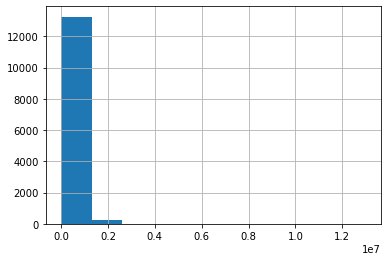

In [123]:
df_drop5.orig_price.hist()

In [124]:
iqr_outliers(df_drop5['orig_price']) # We can not just blindly apply IQR here to filter our dataset from outliers

(-105997.8125, 937996.5625)

In [125]:
df_drop5.orig_price[df_drop5['orig_price'] >= 938000].count() # - about 4.5% of the dataset

629

In [126]:
df_drop5.orig_price[df_drop5['orig_price'] >= 3000000].count() # - high price options after our data cleaning are seriously underpresented, so we have to suggest that our model will be working with bottom and middle housing price predictions

8

In [127]:
# Let's look at the bottom prices
df_drop5[['streetAddress','description','new_price', 'orig_price']].sort_values('orig_price', ascending=True).head(20)

,streetAddress,description,new_price,orig_price
844,3302 Blue Jay Ln,"3302 Blue Jay Ln, Austin, TX 78732 is a single family home that contains 4,094 sq ft and was built in 2000. It contains 5 bedrooms and 5 bathrooms. \r\n \r\nThe Zestimate for this house is $1,681,276. The Rent Zestimate for this home is $7,001/mo.",6056.0,5500.0
9310,1907 Holly St,"Be the first to move in this luxurious home! Custom-built for the owners with highest quality construction. Viking appliances. Built-in Klipsch speakers throughout. Very high tech. Designed by Steve Zagorski this spacious 4 bedroom, 3 bath home has high ceilings, an open floor plan & ample storage. Enjoy the large private yard with outdoor kitchen and high-end grill being built now. East Austin only blocks from Downtown and lake park. Large backyard perfect to entertain. Must see!",6495.0,6000.0
13184,1500 Hartford Rd,"1500 Hartford Rd, Austin, TX 78703 is a single family home that contains 2,693 sq ft and was built in 1932. It contains 6 bedrooms and 4 bathrooms. \r\n \r\nThe Zestimate for this house is $1,162,819. The Rent Zestimate for this home is $5,000/mo.",7463.0,6300.0
14335,3602 River Rd,"Beautiful mid century modern home with a contemporary twist in the heart of Tarrytown. This lovely homes sits tucked among beautiful mature oaks and a masonry fenced yard offers a private back yard escape. The interior includes recent updates, built-ins, skylights, slate and wood flooring. Less than one block from Lake Austin, includes membership to Tarrytown Boat Club (private neighborhood park on Lake Austin) and deeded boat slip with lift convey.",7467.0,6800.0
9272,1604 Eva St,"Rare one-of-a-kind chic home in Bouldin! Private Central Austin Dream - completely private pool and spa surrounded by groomed bamboo, 1 block to famous SOCO, < 1 mile to Auditorium Shores, Lady Bird Lake & DT Austin. Fully renovated, unique open floor plan, amazing architecture, ironworks throughout! Secluded 2nd story oversized master retreat with top deck balcony & amazing master bath. Better-than-new-construction! Updated true chef's kitchen w/ granite countertops.Restrictions: Yes Sprinkler Sys:Yes",7684.0,7500.0
14580,2800 Westlake Dr,"Fabulous, sunny and comfortable in peaceful Westlake! Gourmet kitchen with gas range, granite counter tops, under cabinet lighting, slate floors, new appliances. Hardwood floors throughout; built-in bookshelves/TV/entertainment center. Two huge master suites with walk in closets, double sinks in baths, double shower, Jaccuzzi, soak tub, skylights. Upstairs Master has large walk-in closet and adjoining private room for nursery, workout, studio/office, and walk-out deck. All bedrooms have in-suite baths; one upstairs bedroom may serve as two, each with walk-in closet. Sunny and open, but private. In ground saline pool with covered deck in lanscaped back yard. Hill country views; two Lake Austin marinas and a private beach are steps away.\r\n\r\nNeighborhood Description\r\n\r\nPeaceful, quiet and close to nature. Deer graze throughout the area, and doves can be heard all day (sometimes owls at night). Steps from two marinas and a private beach/picnic area providing access to Lake Austin. Go to http://homepage.mac.com/lemoines for more info, Disclosure Notice, Directions and more.",7996.0,7900.0
9869,4109 E 12th St #2,"Charming condo in one of Austin's desirable East Side. Modern condo ftrs a spacious layout, high ceilings, fresh paint, custom fixtures, & more. Open kitchen w/ granite countertops, SS appliances, breakfast bar & storage. 3 bedrooms, 3 full baths, 2 living areas and 2 dining. Spacious master retreat, w/ dbl vanities, walk-in shower and custom cabinets/lighting. Relax on the front covered porch, garden in the private backyard. Min. to Mueller, DT Austin, UT, hike/bike & local restaurants/entertainment.",8588.0,8000.0
15090,711 E Mcharg,"Owner will finance. 711 E. McHarg Stamford, TX 3/1 $39,900. Nice starter home with detached garage and updated bath. Broker/Owner

In [193]:
# All this prices are clearly a mistake since they are too low for adequate price. Everything that is less than minimim 100000 dollars does not seem adequate enough. Let's count how many mistakes are there:
df_drop5.orig_price[df_drop5['new_price'] < 100000].count()

33

In [194]:
# my decision is to simply drop those as the number is pretty low (0.005%)
df_drop6 = df_drop5.loc[(df_drop5['new_price'] >= 100000)]

In [195]:
# let's group our price by zipcode for visual representations  
zipsorted = pd.DataFrame(df_drop6.groupby('zipcode')['new_price'].mean().sort_values(ascending=True))

In [196]:
pd.options.display.float_format = '{:,.2f}'.format
zipsorted

,new_price
zipcode,
78725,"252,939.31"
78754,"281,340.74"
78744,"293,594.15"
78753,"310,220.44"
78724,"310,774.00"
78747,"321,320.63"
78728,"328,878.73"
78748,"348,083.96"
78758,"369,176.20"


In [197]:
zipsorted.reset_index(inplace=True)
zipsorted['rank'] = zipsorted.index

In [198]:
for i in zipsorted['rank']:
    zipsorted['rank'][i] = zipsorted['rank'][i] + 1

In [199]:
zipsorted = zipsorted.rename(columns={'new_price':'average_zip_price'})

In [200]:
zipsorted

,zipcode,average_zip_price,rank
0,78725,"252,939.31",1
1,78754,"281,340.74",2
2,78744,"293,594.15",3
3,78753,"310,220.44",4
4,78724,"310,774.00",5
5,78747,"321,320.63",6
6,78728,"328,878.73",7
7,78748,"348,083.96",8
8,78758,"369,176.20",9
9,78729,"373,063.58",10


In [201]:
# let's add the rank and average price per zipcode to the working dataframe according to the zipsorted table
df_drop6 = pd.merge(df_drop6, zipsorted, on=['zipcode'], how='left')

Text(0.5, 1.0, 'Price per Zip Code Mean, by Zip Code Mean Rank')

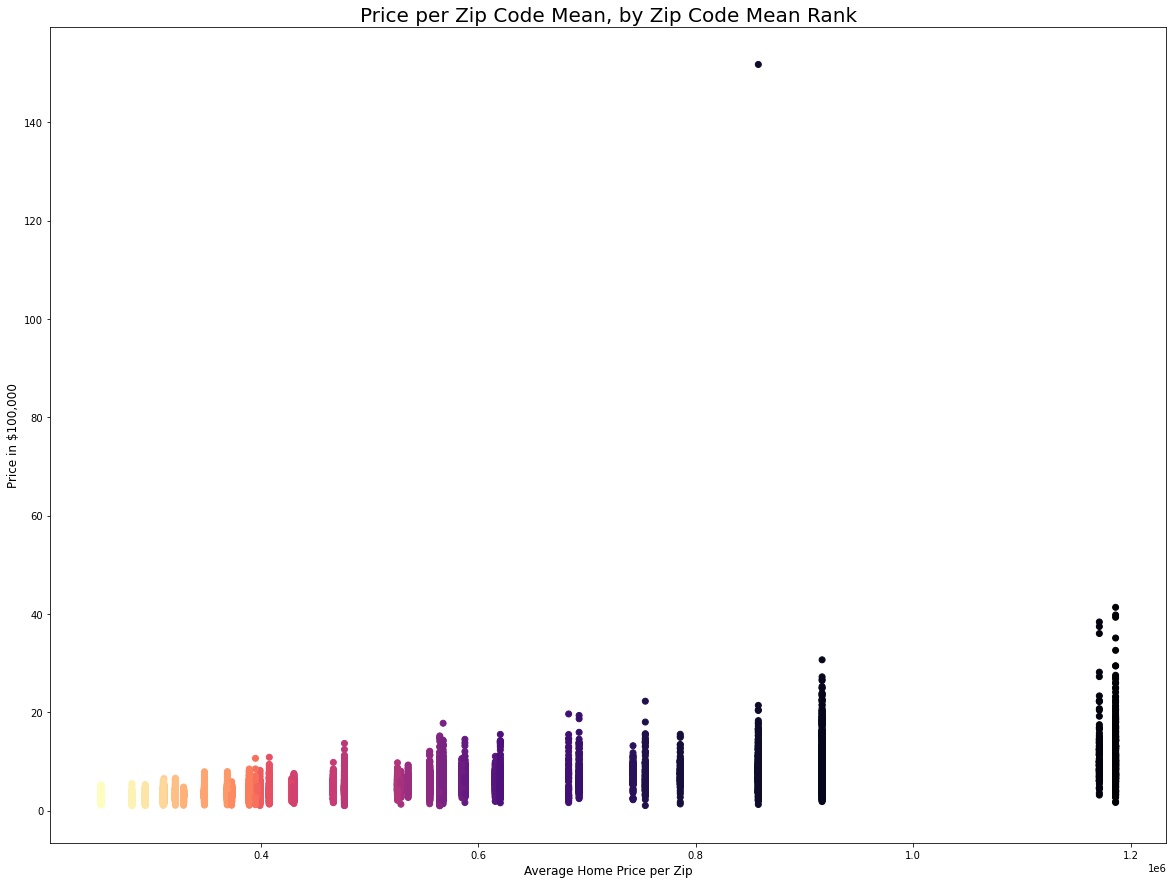

In [202]:
# visualize zip code as a color function

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df_drop6['average_zip_price'], df_drop6['new_price'] /100000, c=df_drop6['rank'], cmap='magma_r')

ax.set_xlabel('Average Home Price per Zip', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Zip Code Mean, by Zip Code Mean Rank', fontsize=20)

In [204]:
# We can see an outlier in price in 78731 zip code. Let's drop it. 
df_drop6.new_price[(df_drop6['new_price'] > 10000000) & (df_drop6['zipcode'] == 78731)]

12643   15,176,992.00
Name: new_price, dtype: float64

In [213]:
df_drop7 = df_drop6.drop(index=[12643])

Text(0.5, 1.0, 'Price per Total Square Footage with colored Zipcode Rank')

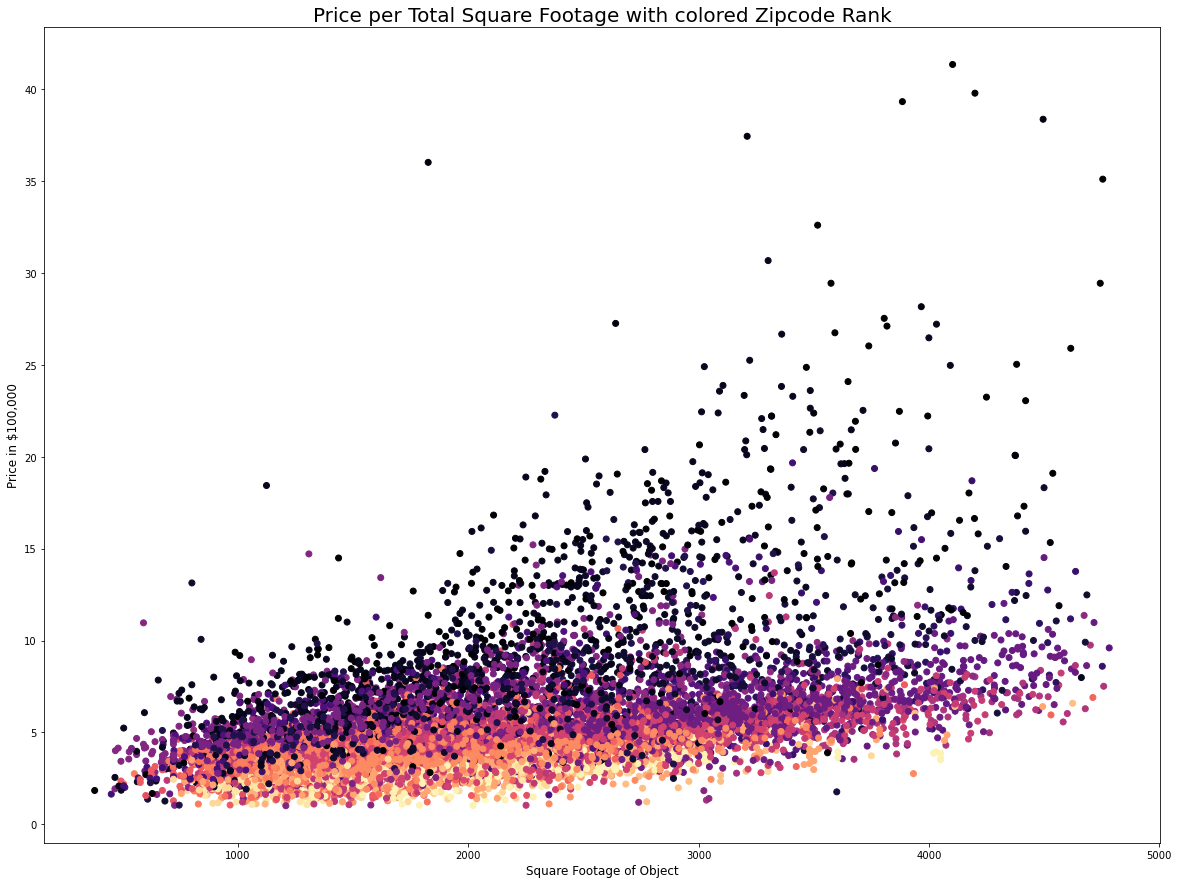

In [217]:
# visualize zip code as a color function, on a plot of price per square footage

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df_drop7['livingAreaSqFt'], df_drop7['new_price'] /100000, c=df_drop7['rank'], cmap='magma_r')

ax.set_xlabel('Square Footage of Object', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Footage with colored Zipcode Rank', fontsize=20)

In [225]:
df_drop7['pr_sqft'] = df_drop7.apply(lambda x: round( (x['new_price'] / x['livingAreaSqFt'] ), 0), axis=1 )

Text(0.5, 1.0, 'Price Per Square Foot to Total Square Footage by Average Price Rank')

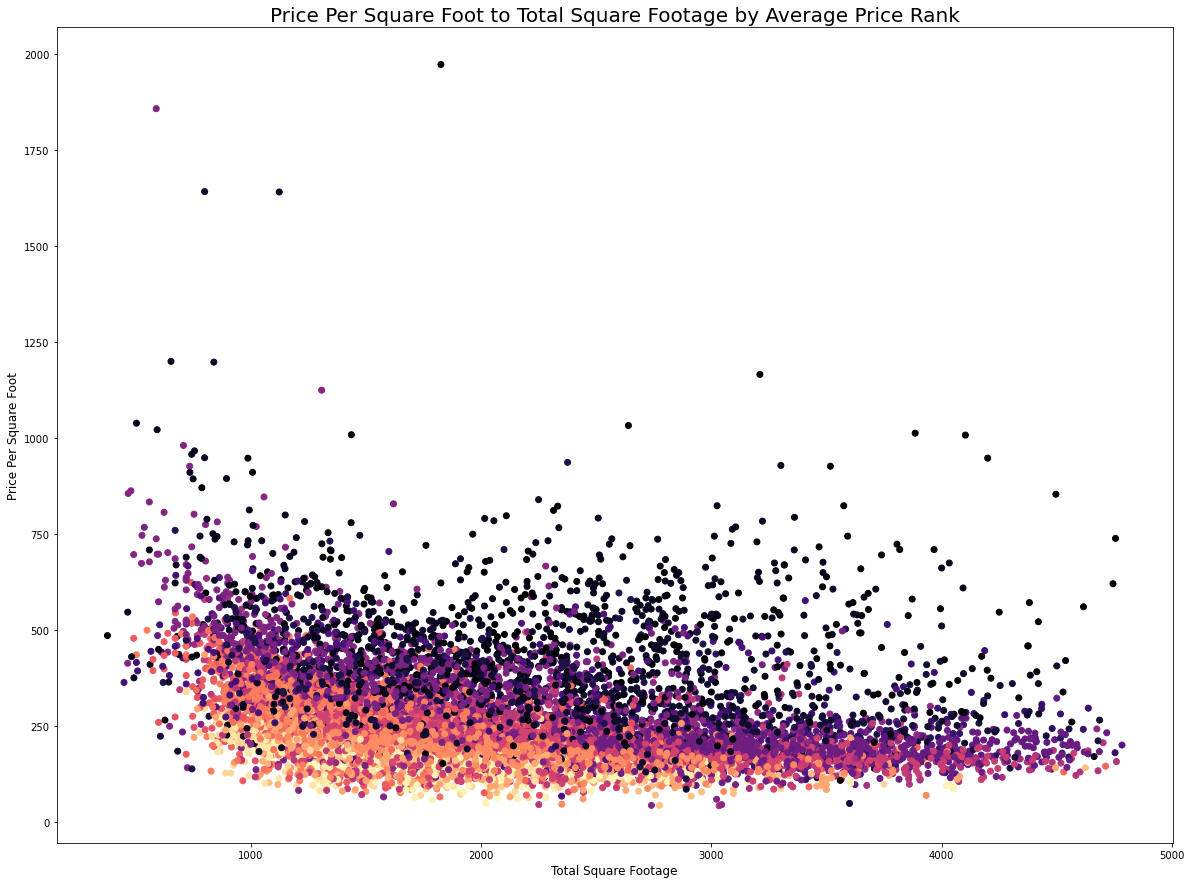

In [229]:
ig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df_drop7['livingAreaSqFt'], df_drop7['pr_sqft'], c=df_drop7['rank'], cmap='magma_r')

ax.set_xlabel('Total Square Footage', fontsize=12)
ax.set_ylabel('Price Per Square Foot', fontsize=12)
ax.set_title('Price Per Square Foot to Total Square Footage by Average Price Rank', fontsize=20)

In [238]:
#dropping irrationally high pr/sqft
df_drop8 = df_drop7[(df_drop7['pr_sqft']<=1000)]

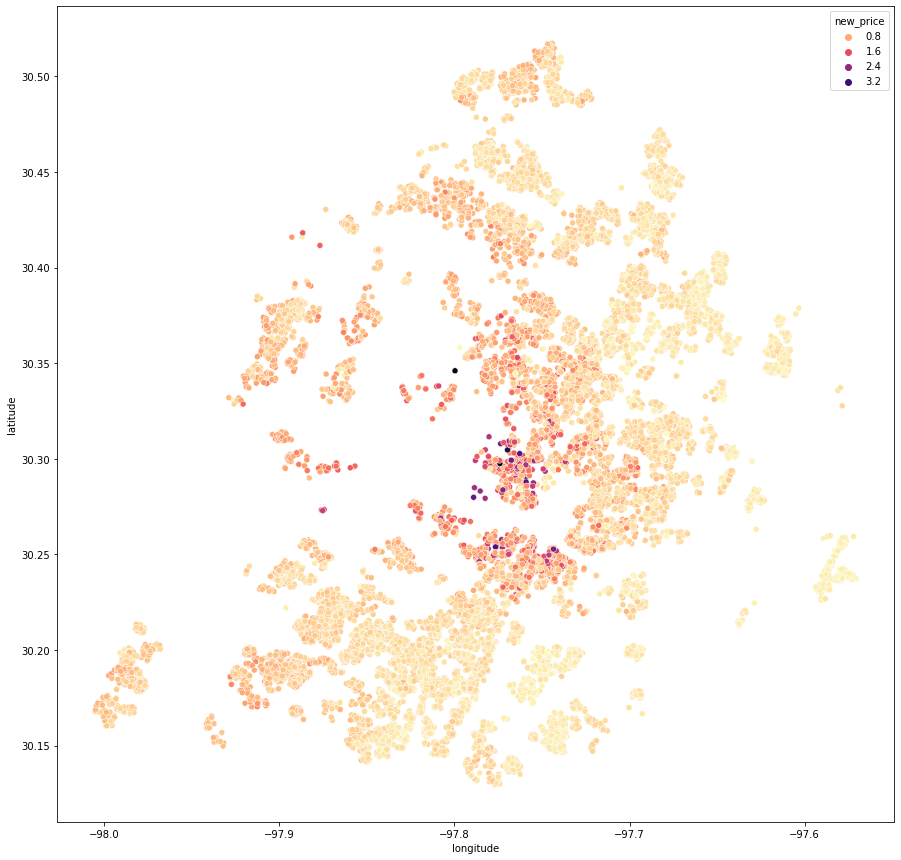

In [240]:
# plotting latitude and longitude as a visual scatter plot. The improved color map actually visually demonstrates
# the removal of extreme price outliers.

plt.figure(figsize=(15,15))

sns.scatterplot(data=df_drop8, x="longitude", y="latitude", hue="new_price", palette="magma_r");

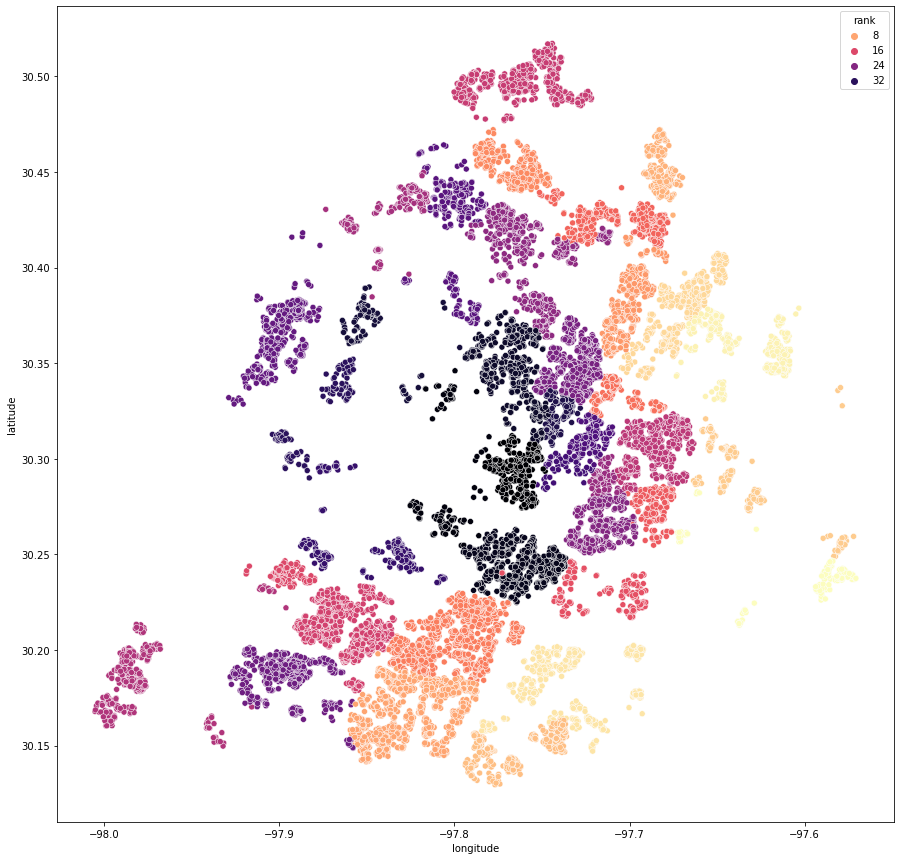

In [241]:
# we can also map our zip codes in this way.

plt.figure(figsize=(15,15))

sns.scatterplot(data=df_drop8, x="longitude", y="latitude", hue="rank", palette="magma_r");

### Dropping the data, that we already used in our analyses or modified somehow

In [242]:
# Let's drop useless data columns for easier further analysis
df_cleared = df_drop8.drop(columns=['orig_price','latitude','longitude','zpid','zipcode','city','streetAddress','numPriceChanges','latestPriceSource','latest_saledate','latest_salemonth','latest_saleyear','numOfPhotos','homeImage','reverse_order'])

### Working with ordinal features

In [243]:
# check data types

df_cleared.dtypes

new_price                     float64
description                    object
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowFeatures             int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleSchools              int64
numOfHighSch

In [244]:
# Let's sum up the num of each type of schools into the numOfSchools by just adding the columns:
df_cleared['numberOfSchools'] = df_cleared['numOfPrimarySchools'] + df_cleared['numOfElementarySchools'] + df_cleared['numOfMiddleSchools'] + df_cleared['numOfHighSchools']

In [245]:
# Let's check that everything worked
df_cleared1 = df_cleared.drop(columns=['numOfPrimarySchools','numOfElementarySchools','numOfMiddleSchools','numOfHighSchools'])

In [246]:
# let's find which ordinal features to convert to bool
ord_features = ['numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures']

df_convert_to_bool = df_cleared1[ord_features]
df_convert_to_bool.describe()

,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures
count,"13,442.00","13,442.00","13,442.00","13,442.00","13,442.00","13,442.00","13,442.00","13,442.00"
mean,0.01,3.49,1.70,0.66,0.47,0.00,0.21,0.01
std,0.18,1.85,0.78,0.97,0.83,0.04,0.48,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,4.00,2.00,1.00,1.00,0.00,0.00,0.00
max,8.00,10.00,6.00,8.00,6.00,2.00,3.00,3.00


In [247]:
# let's convert those that have 50% = 0:
# change all non-null values > 0 in those columns to 1
df_cleared1.loc[df_cleared1['numOfAccessibilityFeatures'] > 0, 'numOfAccessibilityFeatures'] = 1
df_cleared1.loc[df_cleared1['numOfPatioAndPorchFeatures'] > 0, 'numOfPatioAndPorchFeatures'] = 1
df_cleared1.loc[df_cleared1['numOfSecurityFeatures'] > 0, 'numOfSecurityFeatures'] = 1
df_cleared1.loc[df_cleared1['numOfWaterfrontFeatures'] > 0, 'numOfWaterfrontFeatures'] = 1
df_cleared1.loc[df_cleared1['numOfWindowFeatures'] > 0, 'numOfWindowFeatures'] = 1
df_cleared1.loc[df_cleared1['numOfCommunityFeatures'] > 0, 'numOfCommunityFeatures'] = 1

# now anything that is not a 1 becomes a 0
df_cleared1.loc[df_cleared1['numOfAccessibilityFeatures']!= 1, 'numOfAccessibilityFeatures'] = 0
df_cleared1.loc[df_cleared1['numOfPatioAndPorchFeatures'] != 1, 'numOfPatioAndPorchFeatures'] = 0
df_cleared1.loc[df_cleared1['numOfSecurityFeatures'] != 1, 'numOfSecurityFeatures'] = 0
df_cleared1.loc[df_cleared1['numOfWaterfrontFeatures'] != 1, 'numOfWaterfrontFeatures'] = 0
df_cleared1.loc[df_cleared1['numOfWindowFeatures'] != 1, 'numOfWindowFeatures'] = 0
df_cleared1.loc[df_cleared1['numOfCommunityFeatures'] != 1, 'numOfCommunityFeatures'] = 0

# rename to reflect binary
df_cleared1.rename(columns={'numOfAccessibilityFeatures' : 'accessibility', 'numOfPatioAndPorchFeatures' : 'patioporch', 'numOfSecurityFeatures': 'security', 
                  'numOfWaterfrontFeatures': 'waterfront', 'numOfWindowFeatures' : 'windowfeatures', 'numOfCommunityFeatures' : 'community'}, inplace=True)

# convert original boolean columns to binary 0/1
boolean = ['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for item in boolean:
    df_cleared1[boolean] = df_cleared1[boolean].astype(int)

### Natural Language Processing 

In [257]:
# Load spaCy with English language processor
nlp = spacy.load("en_core_web_sm")

# add real estate related stop words to default stop word list
nlp.Defaults.stop_words |= {"bedroom", "bathroom","bath","home", "austin", "tx", "pron", "sq", "ft", "rent", "mo",
                            "w", "bed", 'single', 'family', 'contain', 'st', 'dr', 'square', 'foot', 'room', 'square', 'feet',
                            '-pron-', 'garage', 'pflugerville', 'story', '1st', '1story', '2car', '2nd',
                            '2story', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th', 'street', 'avenue', 'ave', 
                            'sac', "master", "unit"
                           }

In [258]:
# text processing functions for NLP

def preprocessor(word):
    '''processes an individual word to remove punctuation, numbers, special characters etc
    Returns processed word, or blank string if character removal resulted in no word
    ARGUMENT:
    word from line of text'''
    if type(word) == str:
        word = re.sub(r'[^\w\s]', '', word)
        word = re.sub('<[^>]*>', '', word)
        word = re.sub('<[0-9]*>', '', word)
        word = re.sub('[\W]+', '', word.lower())
        try:
            word = int(word)
            word = ''
            return word
        except:
            return word

def word_processor(line):
    '''Takes a line of text. Tokenizes each word of sentence. 
    If token is stop word, goes to next token. If not stop word,
    calls preprocessor on word
    Returns processed words from line
    ARGUMENT: 
    line of text'''
    
    tokens = nlp(line) # nlp reads line and creates tokens from each word  
    words = [] # empty list of words for this line
    
    for token in tokens:
        if token.is_stop == False: # only continues if token is not stop word
            token_preprocessed = preprocessor(token.lemma_) # calls preprocessor on word
            if token_preprocessed != '': # only continues if returned word is not empty
                words.append(token_preprocessed) # appends word to list of words
    return(words) # return list of words for this line

def text_block_processor(text):
    '''Takes a block of text. Divides block into sentences with words lemmatized.
    Sends each sentence to word processor. Concatenates all words into one string
    If the string contains "zestimate", returns a DEFAULT listing note
    Otherwise returns string of cleaned and processed words from text block
    ARGUMENTS:
    block of text
    '''
    
    make_sentences = nlp(text)
    
    sentences_lemmata_list = [sentence.lemma_.lower() for sentence in make_sentences.sents]
    
    these_processed_sentences = ''

    
    for item in sentences_lemmata_list:
        words = word_processor(item)
        line = ' '.join(words)
        these_processed_sentences += (' ' + line)
        
    if 'zestimate' in these_processed_sentences:
        return 'DEFAULT'
    else:
        return these_processed_sentences